Grafik 'steigung_punkte_skizze.png' wurde erfolgreich erstellt und gespeichert.


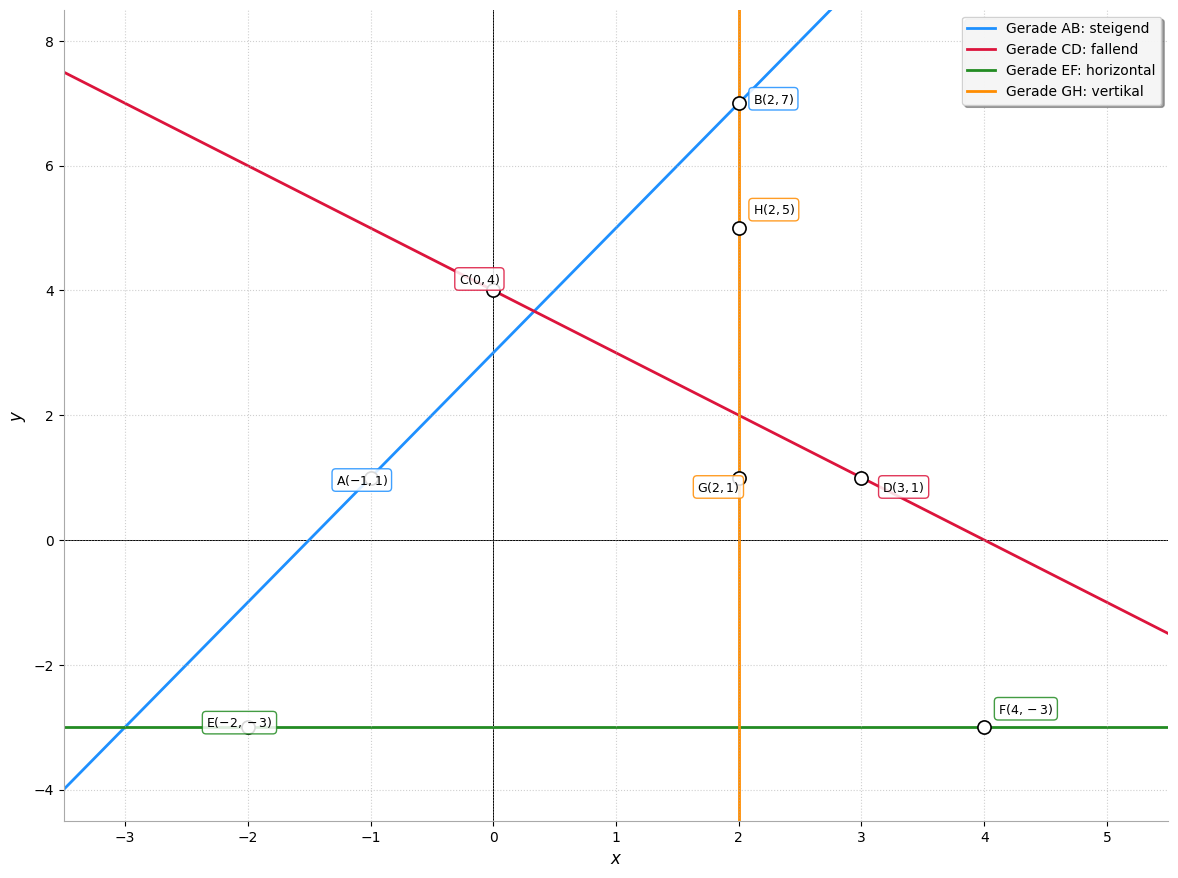

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Punkte definieren
points_data = {
    'AB': {'coords': ((-1, 1), (2, 7)), 'desc': 'steigend', 'color': 'dodgerblue', 'labels': ['A', 'B']},
    'CD': {'coords': ((0, 4), (3, 1)), 'desc': 'fallend', 'color': 'crimson', 'labels': ['C', 'D']},
    'EF': {'coords': ((-2, -3), (4, -3)), 'desc': 'horizontal', 'color': 'forestgreen', 'labels': ['E', 'F']},
    'GH': {'coords': ((2, 1), (2, 5)), 'desc': 'vertikal', 'color': 'darkorange', 'labels': ['G', 'H']}
}

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(12, 9)) # Ein einzelner Plot

# Farbe für Textbeschriftungen definieren
text_color = 'black'

# Bestimme die Gesamtgrenzen für alle Punkte
all_x_coords = []
all_y_coords = []
for key in points_data:
    (x1, y1), (x2, y2) = points_data[key]['coords']
    all_x_coords.extend([x1, x2])
    all_y_coords.extend([y1, y2])

x_min_all, x_max_all = min(all_x_coords), max(all_x_coords)
y_min_all, y_max_all = min(all_y_coords), max(all_y_coords)

x_buffer_all = max(1.5, (x_max_all - x_min_all) * 0.15)
y_buffer_all = max(1.5, (y_max_all - y_min_all) * 0.15)

plot_xlim = (x_min_all - x_buffer_all, x_max_all + x_buffer_all)
plot_ylim = (y_min_all - y_buffer_all, y_max_all + y_buffer_all)
ax.set_xlim(plot_xlim)
ax.set_ylim(plot_ylim)


for key, data in points_data.items():
    (x1, y1), (x2, y2) = data['coords']
    desc = data['desc']
    color = data['color']
    p_labels = data['labels']

    # Koordinaten für die verlängerte Linie
    x_ext, y_ext = [], []
    if x1 == x2: # Vertikale Linie
        x_ext = [x1, x1]
        y_ext = [plot_ylim[0], plot_ylim[1]]
    elif y1 == y2: # Horizontale Linie
        x_ext = [plot_xlim[0], plot_xlim[1]]
        y_ext = [y1, y1]
    else: # Schräge Linie
        m = (y2 - y1) / (x2 - x1)
        c_intercept = y1 - m * x1

        x_ext = np.array(plot_xlim)
        y_ext = m * x_ext + c_intercept

    # Verlängerte Linie zeichnen
    ax.plot(x_ext, y_ext, color=color, linewidth=2.0, zorder=1, label=f'Gerade {key}: {desc}')

    # Originalpunkte als deutliche Marker zeichnen
    ax.scatter([x1, x2], [y1, y2], color=color, s=90, zorder=3, marker='o',
               edgecolors='black', linewidths=1.2, facecolors='white')

    # Punkte beschriften
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec=color, alpha=0.85, lw=1)
    # Manuelle Offsets für bessere Lesbarkeit im gemeinsamen Plot
    offsets = {
        'A': (-25, -5), 'B': (10, 0),
        'C': (-25, 5), 'D': (15, -10),
        'E': (-30, 0), 'F': (10, 10),
        'G': (-30, -10), 'H': (10, 10)
    }

    ax.annotate(f'{p_labels[0]}$({x1},{y1})$', (x1, y1), textcoords="offset points", xytext=offsets.get(p_labels[0], (10,10)),
                color=text_color, fontsize=9, bbox=bbox_props, zorder=4)
    ax.annotate(f'{p_labels[1]}$({x2},{y2})$', (x2, y2), textcoords="offset points", xytext=offsets.get(p_labels[1], (10,10)),
                color=text_color, fontsize=9, bbox=bbox_props, zorder=4)


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$y$', fontsize=12, fontweight='bold')
# ax.set_title("Unterschiedliche Geradensteigungen", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
# ax.spines['left'].set_position('zero') # Für allgemeine Darstellung nicht immer ideal
# ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende
ax.legend(loc='best', fontsize=10, frameon=True, framealpha=0.9, shadow=True)

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('steigung_punkte_skizze.png', dpi=300)
    print("Grafik 'steigung_punkte_skizze.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'lin_fkt_teil1_skizze.png' wurde erfolgreich erstellt und gespeichert.


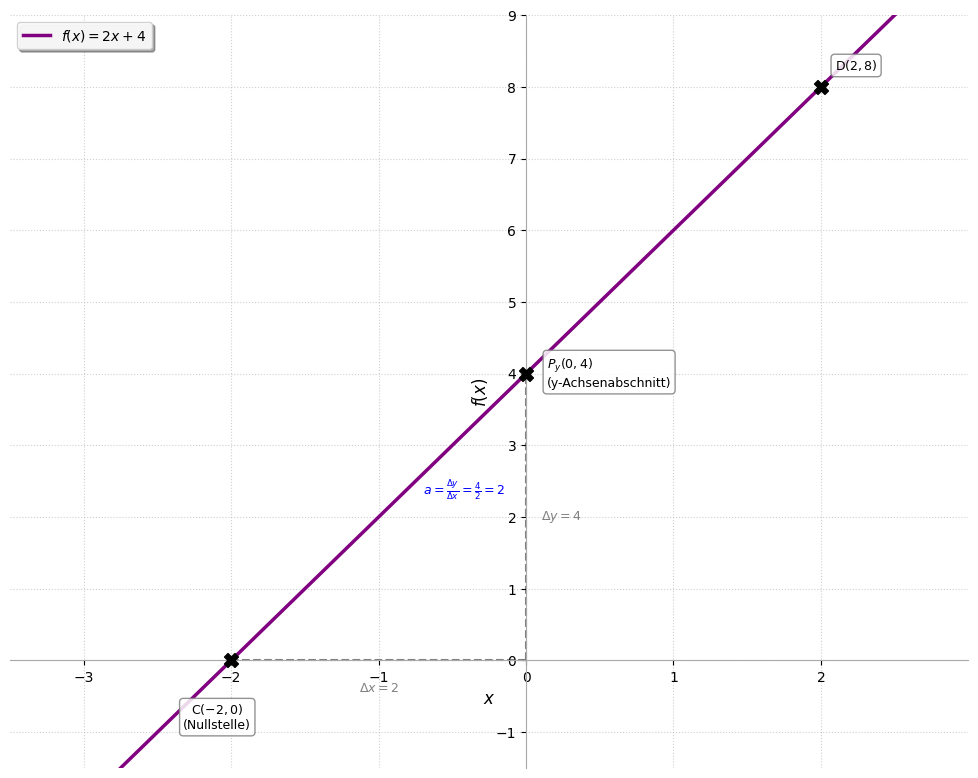

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Definiere die Funktion
def f(x):
    return 2 * x + 4

# x-Werte für die Darstellung der Geraden
x_vals = np.linspace(-3.5, 2.5, 400)
y_vals = f(x_vals)

# Wichtige Punkte
# C(-2|0) - Nullstelle
c_x, c_y = -2, f(-2)
# D(2|8)
d_x, d_y = 2, f(2)
# y-Achsenabschnitt (0|4)
y_intercept_x, y_intercept_y = 0, f(0)

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 8))

# Farben
func_color = 'purple'
point_color = 'black'
slope_triangle_color = 'gray'
text_color = 'black'

# Funktion plotten
ax.plot(x_vals, y_vals, color=func_color, linewidth=2.5, label='$f(x) = 2x + 4$', zorder=2)

# Wichtige Punkte markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.85, lw=1)

# Punkt C (Nullstelle)
ax.scatter(c_x, c_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'C$({c_x},{c_y})$\n(Nullstelle)', (c_x, c_y), textcoords="offset points",
            xytext=(-10, -30), ha='center', va='top', fontsize=9, bbox=bbox_props)

# Punkt D
ax.scatter(d_x, d_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'D$({d_x},{d_y})$', (d_x, d_y), textcoords="offset points",
            xytext=(10, 10), ha='left', va='bottom', fontsize=9, bbox=bbox_props)

# y-Achsenabschnitt
ax.scatter(y_intercept_x, y_intercept_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'$P_y({y_intercept_x},{y_intercept_y})$\n(y-Achsenabschnitt)', (y_intercept_x, y_intercept_y),
            textcoords="offset points", xytext=(15, 0), ha='left', va='center', fontsize=9, bbox=bbox_props)

# Steigungsdreieck (z.B. von C nach (0,4) oder von C aus 1 nach rechts, 2 nach oben)
# Variante 1: Von C(-2,0) zu (0,4)
delta_x1 = y_intercept_x - c_x # = 0 - (-2) = 2
delta_y1 = y_intercept_y - c_y # = 4 - 0 = 4
ax.plot([c_x, y_intercept_x], [c_y, c_y], color=slope_triangle_color, linestyle='--', lw=1.5, zorder=1) # Horizontale Linie
ax.plot([y_intercept_x, y_intercept_x], [c_y, y_intercept_y], color=slope_triangle_color, linestyle='--', lw=1.5, zorder=1) # Vertikale Linie
ax.text(c_x + delta_x1 / 2, c_y - 0.3, f'$\\Delta x = {delta_x1}$', ha='center', va='top', fontsize=9, color=slope_triangle_color)
ax.text(y_intercept_x + 0.1, c_y + delta_y1 / 2, f'$\\Delta y = {delta_y1}$', ha='left', va='center', fontsize=9, color=slope_triangle_color)
ax.text(c_x + delta_x1 / 2 + 0.3, c_y + delta_y1 / 2 + 0.3, '$a = \\frac{\\Delta y}{\\Delta x} = \\frac{4}{2}=2$', fontsize=9, color='blue', ha='left')


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$f(x)$', fontsize=12, fontweight='bold')
# ax.set_title("Gerade $f(x)=2x+4$ mit Punkten und Steigungsdreieck", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende (nur für die Funktion selbst)
ax.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen
ax.set_xlim(-3.5, 3)
ax.set_ylim(-1.5, 9)
ax.set_xticks(np.arange(-3, 3, 1))
ax.set_yticks(np.arange(-1, 10, 1))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('lin_fkt_teil1_skizze.png', dpi=300)
    print("Grafik 'lin_fkt_teil1_skizze.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'lin_fkt_teil2_skizze.png' wurde erfolgreich erstellt und gespeichert.


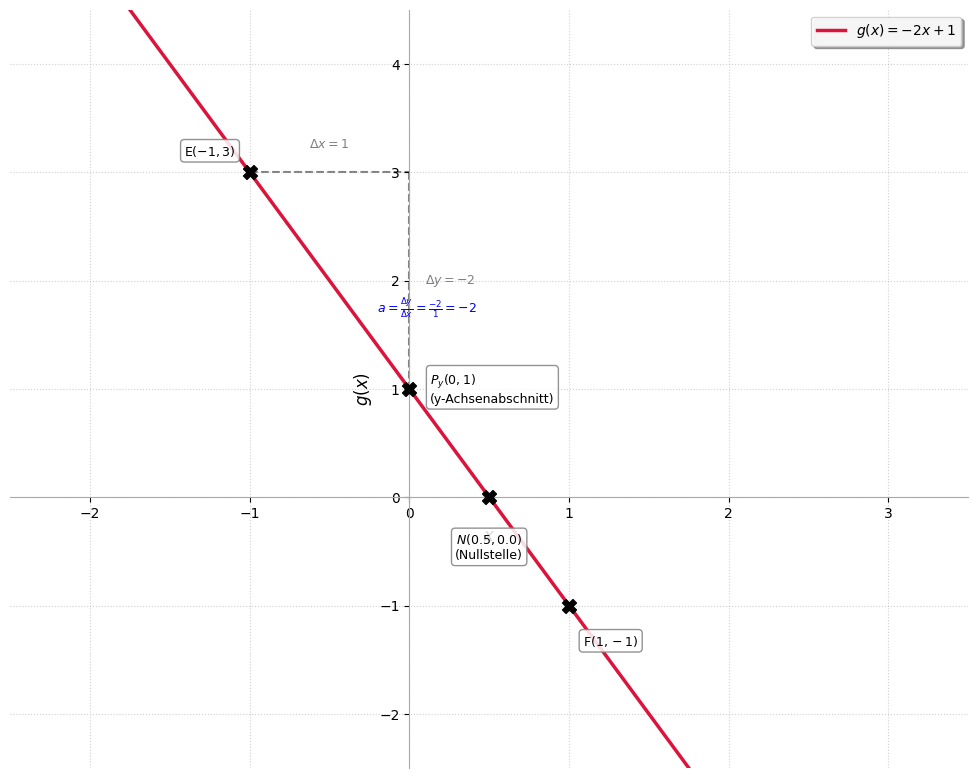

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Definiere die Funktion
def g(x):
    return -2 * x + 1

# x-Werte für die Darstellung der Geraden
x_vals = np.linspace(-2, 3, 400)
y_vals = g(x_vals)

# Wichtige Punkte
# E(-1|3)
e_x, e_y = -1, g(-1)
# F(1|-1)
f_x, f_y = 1, g(1)
# y-Achsenabschnitt (0|1)
y_intercept_x, y_intercept_y = 0, g(0)
# Nullstelle (0.5|0)
# -2x + 1 = 0 => 2x = 1 => x = 0.5
nullstelle_x, nullstelle_y = 0.5, g(0.5)


# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 8))

# Farben
func_color = 'crimson' # Andere Farbe als die vorherige Funktion
point_color = 'black'
slope_triangle_color = 'gray'
text_color = 'black'

# Funktion plotten
ax.plot(x_vals, y_vals, color=func_color, linewidth=2.5, label='$g(x) = -2x + 1$', zorder=2)

# Wichtige Punkte markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.85, lw=1)

# Punkt E
ax.scatter(e_x, e_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'E$({e_x},{e_y})$', (e_x, e_y), textcoords="offset points",
            xytext=(-10, 10), ha='right', va='bottom', fontsize=9, bbox=bbox_props)

# Punkt F
ax.scatter(f_x, f_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'F$({f_x},{f_y})$', (f_x, f_y), textcoords="offset points",
            xytext=(10, -20), ha='left', va='top', fontsize=9, bbox=bbox_props)

# y-Achsenabschnitt
ax.scatter(y_intercept_x, y_intercept_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'$P_y({y_intercept_x},{y_intercept_y})$\n(y-Achsenabschnitt)', (y_intercept_x, y_intercept_y),
            textcoords="offset points", xytext=(15, 0), ha='left', va='center', fontsize=9, bbox=bbox_props)

# Nullstelle
ax.scatter(nullstelle_x, nullstelle_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'$N({nullstelle_x},{nullstelle_y})$\n(Nullstelle)', (nullstelle_x, nullstelle_y),
            textcoords="offset points", xytext=(0, -25), ha='center', va='top', fontsize=9, bbox=bbox_props)


# Steigungsdreieck (z.B. von E aus: 1 Einheit nach rechts, 2 Einheiten nach unten)
# Startpunkt für Dreieck: E(-1,3)
delta_x_val = 1
delta_y_val = -2 # Da Steigung -2 ist
end_point_triangle_x = e_x + delta_x_val
end_point_triangle_y = e_y + delta_y_val # Sollte g(e_x + delta_x_val) sein

ax.plot([e_x, end_point_triangle_x], [e_y, e_y], color=slope_triangle_color, linestyle='--', lw=1.5, zorder=1) # Horizontale Linie
ax.plot([end_point_triangle_x, end_point_triangle_x], [e_y, end_point_triangle_y], color=slope_triangle_color, linestyle='--', lw=1.5, zorder=1) # Vertikale Linie

ax.text(e_x + delta_x_val / 2, e_y + 0.2, f'$\\Delta x = {delta_x_val}$', ha='center', va='bottom', fontsize=9, color=slope_triangle_color)
ax.text(end_point_triangle_x + 0.1, e_y + delta_y_val / 2, f'$\\Delta y = {delta_y_val}$', ha='left', va='center', fontsize=9, color=slope_triangle_color)
ax.text(e_x + delta_x_val / 2 + 0.3, e_y + delta_y_val / 2 - 0.3, '$a = \\frac{\\Delta y}{\\Delta x} = \\frac{-2}{1}=-2$', fontsize=9, color='blue', ha='left')


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$g(x)$', fontsize=12, fontweight='bold')
# ax.set_title("Gerade $g(x)=-2x+1$ mit Punkten und Steigungsdreieck", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende (nur für die Funktion selbst)
ax.legend(loc='upper right', fontsize=10, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen
ax.set_xlim(-2.5, 3.5)
ax.set_ylim(-2.5, 4.5)
ax.set_xticks(np.arange(-2, 4, 1))
ax.set_yticks(np.arange(-2, 5, 1))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('lin_fkt_teil2_skizze.png', dpi=300)
    print("Grafik 'lin_fkt_teil2_skizze.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'wertetabelle_graph_g_x.png' wurde erfolgreich erstellt und gespeichert.


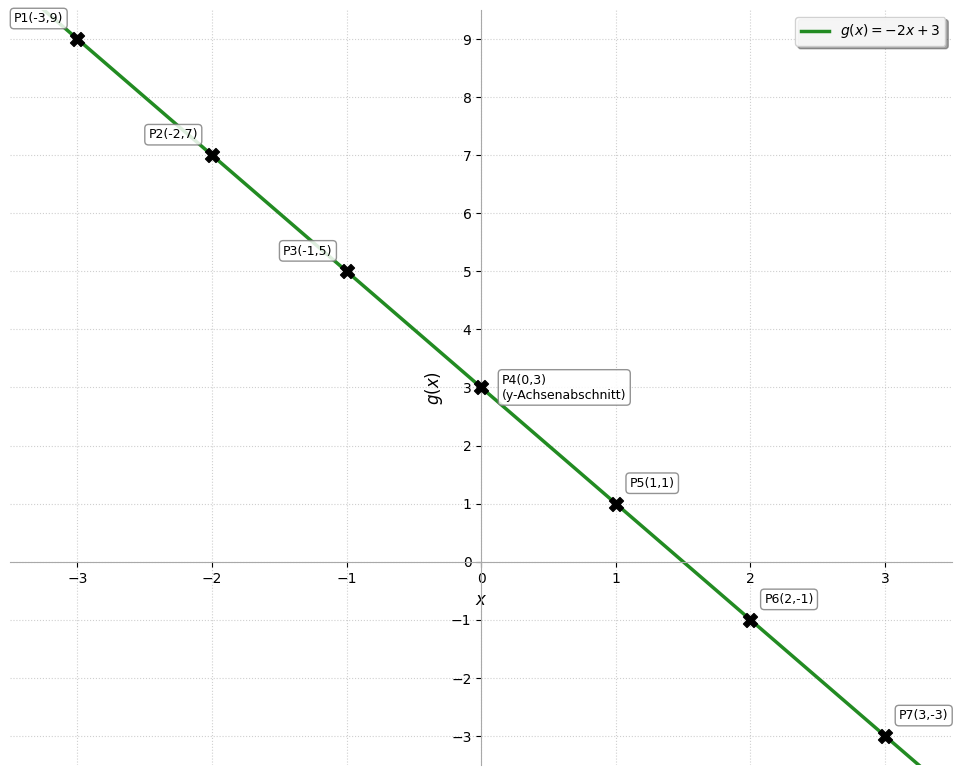

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Definiere die Funktion
def g(x):
    return -2 * x + 3

# x-Werte für die Darstellung der Geraden
x_vals_line = np.linspace(-3.5, 3.5, 400)
y_vals_line = g(x_vals_line)

# Punkte aus der Wertetabelle
points_x = np.array([-3, -2, -1, 0, 1, 2, 3])
points_y = g(points_x)
point_labels = [f'P{i+1}({px},{py})' for i, (px, py) in enumerate(zip(points_x, points_y))]

# y-Achsenabschnitt (identisch mit P4)
y_intercept_x, y_intercept_y = 0, g(0)


# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 8))

# Farben
func_color = 'forestgreen'
point_color = 'black'
text_color = 'black'

# Funktion plotten
ax.plot(x_vals_line, y_vals_line, color=func_color, linewidth=2.5, label='$g(x) = -2x + 3$', zorder=2)

# Punkte aus der Wertetabelle markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.85, lw=1)

for i in range(len(points_x)):
    px, py = points_x[i], points_y[i]
    label = point_labels[i]
    ax.scatter(px, py, color=point_color, marker=marker_style, s=marker_size, zorder=5)
    # Position der Labels anpassen, um Überlappungen zu vermeiden
    if px == 0: # y-Achsenabschnitt
        ax.annotate(label + "\n(y-Achsenabschnitt)", (px, py), textcoords="offset points",
                    xytext=(15, 0), ha='left', va='center', fontsize=9, bbox=bbox_props)
    elif px < 0:
         ax.annotate(label, (px, py), textcoords="offset points",
                    xytext=(-10, 10), ha='right', va='bottom', fontsize=9, bbox=bbox_props)
    else:
         ax.annotate(label, (px, py), textcoords="offset points",
                    xytext=(10, 10), ha='left', va='bottom', fontsize=9, bbox=bbox_props)


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$g(x)$', fontsize=12, fontweight='bold')
# ax.set_title("Graph von $g(x)=-2x+3$ aus Wertetabelle", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende (nur für die Funktion selbst)
ax.legend(loc='upper right', fontsize=10, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 9.5)
ax.set_xticks(np.arange(-3, 4, 1))
ax.set_yticks(np.arange(-3, 10, 1))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('wertetabelle_graph_g_x.png', dpi=300)
    print("Grafik 'wertetabelle_graph_g_x.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'schnittpunkt_teil2_f_g.png' wurde erfolgreich erstellt und gespeichert.


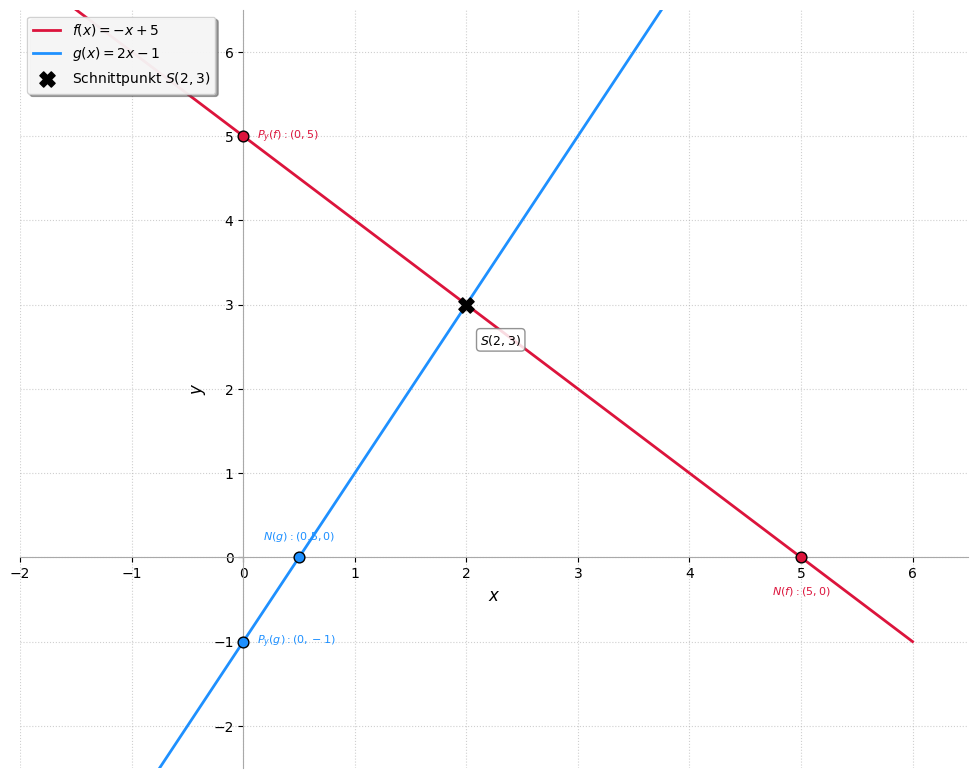

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Definiere die Funktionen
def f(x):
    return -x + 5

def g(x):
    return 2 * x - 1

# x-Werte für die Darstellung der Geraden
x_vals_line = np.linspace(-2, 6, 400)
y_vals_f = f(x_vals_line)
y_vals_g = g(x_vals_line)

# Wichtige Punkte
# Schnittpunkt S(2,3)
s_x, s_y = 2, 3 # f(2) = -2+5 = 3; g(2) = 2*2-1 = 3

# y-Achsenabschnitte
y_intercept_f_x, y_intercept_f_y = 0, f(0) # (0,5)
y_intercept_g_x, y_intercept_g_y = 0, g(0) # (0,-1)

# Nullstellen
# f(x) = 0 => -x + 5 = 0 => x = 5
nullstelle_f_x, nullstelle_f_y = 5, 0
# g(x) = 0 => 2x - 1 = 0 => x = 0.5
nullstelle_g_x, nullstelle_g_y = 0.5, 0


# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 8))

# Farben
func_f_color = 'crimson'
func_g_color = 'dodgerblue'
point_color = 'black'
text_color = 'black'

# Funktionen plotten
ax.plot(x_vals_line, y_vals_f, color=func_f_color, linewidth=2.0, label='$f(x) = -x + 5$', zorder=2)
ax.plot(x_vals_line, y_vals_g, color=func_g_color, linewidth=2.0, label='$g(x) = 2x - 1$', zorder=2)

# Punkte markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.85, lw=1)

# Schnittpunkt S
ax.scatter(s_x, s_y, color=point_color, marker=marker_style, s=marker_size + 20, zorder=5, label='Schnittpunkt $S(2,3)$')
ax.annotate(f'$S({s_x},{s_y})$', (s_x, s_y), textcoords="offset points",
            xytext=(10, -20), ha='left', va='top', fontsize=9, bbox=bbox_props)

# y-Achsenabschnitte
ax.scatter(y_intercept_f_x, y_intercept_f_y, color=func_f_color, marker='o', s=60, zorder=4, edgecolors='black')
ax.annotate(f'$P_y (f): (0,5)$', (y_intercept_f_x, y_intercept_f_y), textcoords="offset points",
            xytext=(10, 0), ha='left', va='center', fontsize=8, color=func_f_color)

ax.scatter(y_intercept_g_x, y_intercept_g_y, color=func_g_color, marker='o', s=60, zorder=4, edgecolors='black')
ax.annotate(f'$P_y (g): (0,-1)$', (y_intercept_g_x, y_intercept_g_y), textcoords="offset points",
            xytext=(10, 0), ha='left', va='center', fontsize=8, color=func_g_color)

# Nullstellen
ax.scatter(nullstelle_f_x, nullstelle_f_y, color=func_f_color, marker='o', s=60, zorder=4, edgecolors='black')
ax.annotate(f'$N (f): (5,0)$', (nullstelle_f_x, nullstelle_f_y), textcoords="offset points",
            xytext=(0, -20), ha='center', va='top', fontsize=8, color=func_f_color)

ax.scatter(nullstelle_g_x, nullstelle_g_y, color=func_g_color, marker='o', s=60, zorder=4, edgecolors='black')
ax.annotate(f'$N (g): (0.5,0)$', (nullstelle_g_x, nullstelle_g_y), textcoords="offset points",
            xytext=(0, 10), ha='center', va='bottom', fontsize=8, color=func_g_color)


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$y$', fontsize=12, fontweight='bold') # y statt g(x) oder f(x) für Allgemeinheit
# ax.set_title("Schnittpunkt von $f(x)=-x+5$ und $g(x)=2x-1$", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende
ax.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen
ax.set_xlim(-2, 6.5)
ax.set_ylim(-2.5, 6.5)
ax.set_xticks(np.arange(-2, 7, 1))
ax.set_yticks(np.arange(-2, 7, 1))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('schnittpunkt_teil2_f_g.png', dpi=300)
    print("Grafik 'schnittpunkt_teil2_f_g.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'taxikosten_graph.png' wurde erfolgreich erstellt und gespeichert.


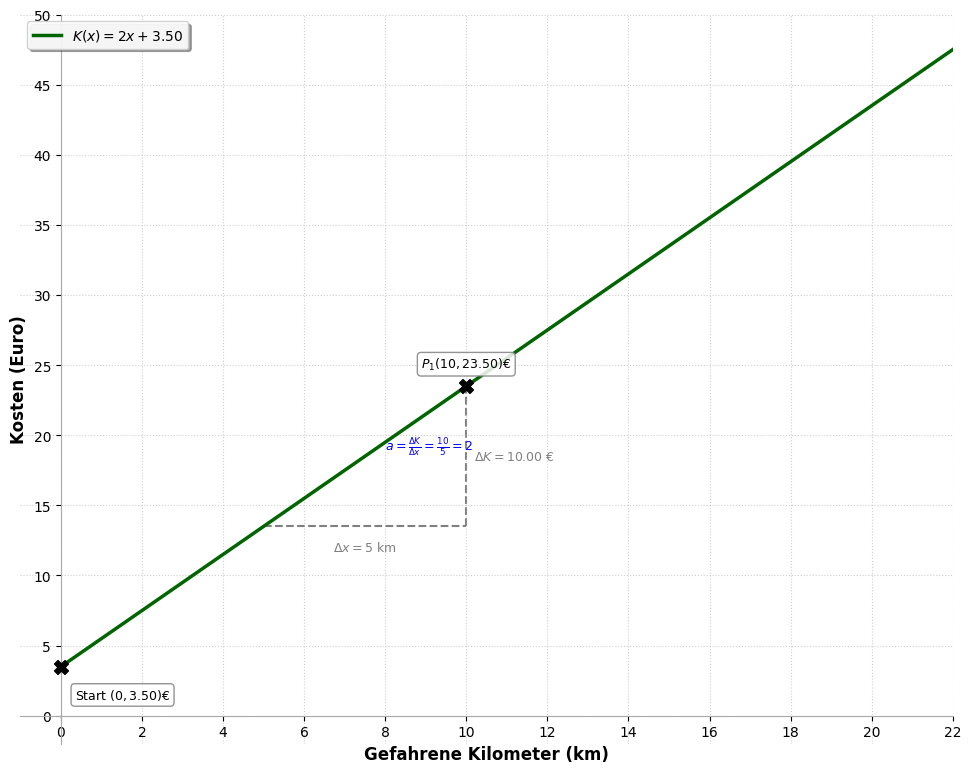

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Definiere die Kostenfunktion
def K(x):
    return 2 * x + 3.50

# x-Werte für die Darstellung der Geraden (von 0 bis 20 km)
x_vals_line = np.linspace(0, 22, 400) # Etwas über 20km für bessere Sichtbarkeit
y_vals_line = K(x_vals_line)

# Wichtige Punkte
# y-Achsenabschnitt (Startpunkt)
start_x, start_y = 0, K(0) # (0, 3.50)

# Ein weiterer Punkt, z.B. bei 10 km
p1_x, p1_y = 10, K(10) # (10, 23.50)

# Endpunkt bei 20 km (optional zur Markierung)
p2_x, p2_y = 20, K(20) # (20, 43.50)


# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 8))

# Farben
func_color = 'darkgreen'
point_color = 'black'
slope_triangle_color = 'gray'
text_color = 'black'

# Funktion plotten (nur für x >= 0)
ax.plot(x_vals_line[x_vals_line >= 0], y_vals_line[x_vals_line >= 0], color=func_color, linewidth=2.5, label='$K(x) = 2x + 3.50$', zorder=2)

# Punkte markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.85, lw=1)

# y-Achsenabschnitt (Startpunkt)
ax.scatter(start_x, start_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'Start $(0, {start_y:.2f})$€', (start_x, start_y), textcoords="offset points",
            xytext=(10, -15), ha='left', va='top', fontsize=9, bbox=bbox_props)

# Weiterer Punkt P1(10, 23.50)
ax.scatter(p1_x, p1_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'$P_1(10, {p1_y:.2f})$€', (p1_x, p1_y), textcoords="offset points",
            xytext=(0, 10), ha='center', va='bottom', fontsize=9, bbox=bbox_props)

# Steigungsdreieck, z.B. von (5, K(5)) aus: 5 nach rechts, 10 nach oben
# Startpunkt für Dreieck: (5, K(5)) = (5, 13.50)
x_tri_start = 5
y_tri_start = K(x_tri_start)
delta_x_tri = 5
delta_y_tri = 2 * delta_x_tri # Steigung ist 2

ax.plot([x_tri_start, x_tri_start + delta_x_tri], [y_tri_start, y_tri_start], color=slope_triangle_color, linestyle='--', lw=1.5, zorder=1) # Horizontale Linie
ax.plot([x_tri_start + delta_x_tri, x_tri_start + delta_x_tri], [y_tri_start, y_tri_start + delta_y_tri], color=slope_triangle_color, linestyle='--', lw=1.5, zorder=1) # Vertikale Linie

ax.text(x_tri_start + delta_x_tri / 2, y_tri_start - 1, f'$\\Delta x = {delta_x_tri}$ km', ha='center', va='top', fontsize=9, color=slope_triangle_color)
ax.text(x_tri_start + delta_x_tri + 0.2, y_tri_start + delta_y_tri / 2, f'$\\Delta K = {delta_y_tri:.2f}$ €', ha='left', va='center', fontsize=9, color=slope_triangle_color)
ax.text(x_tri_start + delta_x_tri /2 + 0.5, y_tri_start + delta_y_tri /2 + 0.5, '$a = \\frac{\\Delta K}{\\Delta x} = \\frac{10}{5}=2$', fontsize=9, color='blue', ha='left')


# Achsen und Titel
ax.set_xlabel('Gefahrene Kilometer (km)', fontsize=12, fontweight='bold')
ax.set_ylabel('Kosten (Euro)', fontsize=12, fontweight='bold')
# ax.set_title("Taxikostenfunktion $K(x)=2x+3.50$", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende (nur für die Funktion selbst)
ax.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen
ax.set_xlim(-1, 22)
ax.set_ylim(-2, 50)
ax.set_xticks(np.arange(0, 23, 2))
ax.set_yticks(np.arange(0, 51, 5))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('taxikosten_graph.png', dpi=300)
    print("Grafik 'taxikosten_graph.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'funktion_checkliste_graph.png' wurde erfolgreich erstellt und gespeichert.


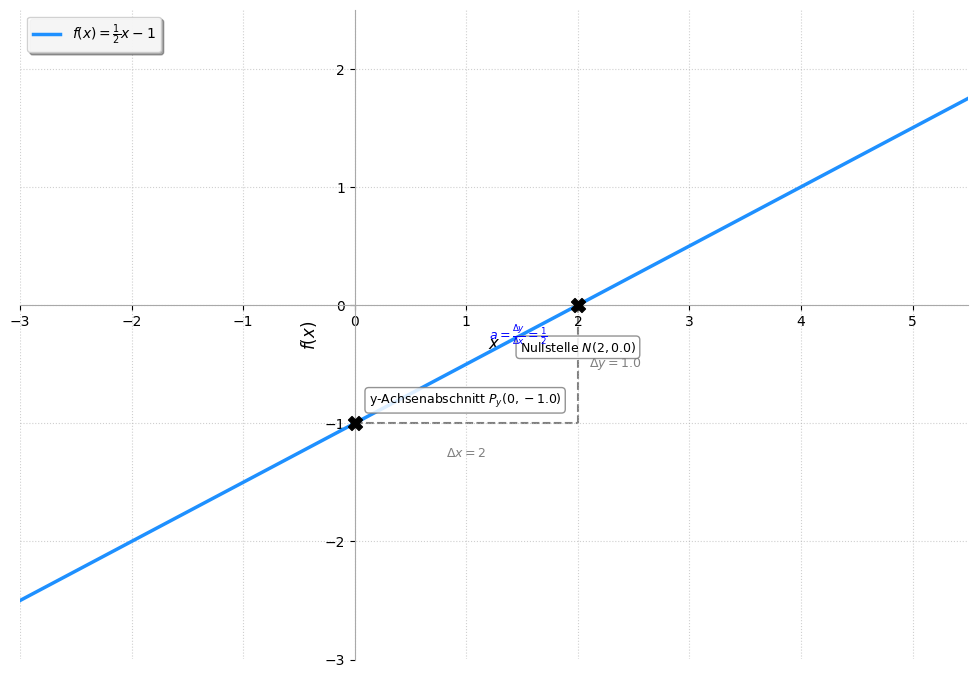

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Definiere die Funktion
def f(x):
    return 0.5 * x - 1

# x-Werte für die Darstellung der Geraden
x_vals_line = np.linspace(-3, 5.5, 400)
y_vals_line = f(x_vals_line)

# Wichtige Punkte
# Nullstelle (2,0)
# 0.5x - 1 = 0 => 0.5x = 1 => x = 2
nullstelle_x, nullstelle_y = 2, f(2)

# y-Achsenabschnitt (0,-1)
y_intercept_x, y_intercept_y = 0, f(0)


# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 7))

# Farben
func_color = 'dodgerblue'
point_color = 'black'
slope_triangle_color = 'gray'
text_color = 'black'

# Funktion plotten
ax.plot(x_vals_line, y_vals_line, color=func_color, linewidth=2.5, label='$f(x) = \\frac{1}{2}x - 1$', zorder=2)

# Punkte markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.85, lw=1)

# Nullstelle
ax.scatter(nullstelle_x, nullstelle_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'Nullstelle $N({nullstelle_x},{nullstelle_y})$', (nullstelle_x, nullstelle_y),
            textcoords="offset points", xytext=(0, -25), ha='center', va='top', fontsize=9, bbox=bbox_props)

# y-Achsenabschnitt
ax.scatter(y_intercept_x, y_intercept_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'y-Achsenabschnitt $P_y({y_intercept_x},{y_intercept_y})$', (y_intercept_x, y_intercept_y),
            textcoords="offset points", xytext=(10, 10), ha='left', va='bottom', fontsize=9, bbox=bbox_props)

# Steigungsdreieck (z.B. von (0,-1) aus: 2 Einheiten nach rechts, 1 Einheit nach oben)
# Startpunkt für Dreieck: y-Achsenabschnitt (0,-1)
x_tri_start = y_intercept_x
y_tri_start = y_intercept_y
delta_x_tri = 2
delta_y_tri = 0.5 * delta_x_tri # Steigung ist 0.5

ax.plot([x_tri_start, x_tri_start + delta_x_tri], [y_tri_start, y_tri_start], color=slope_triangle_color, linestyle='--', lw=1.5, zorder=1) # Horizontale Linie
ax.plot([x_tri_start + delta_x_tri, x_tri_start + delta_x_tri], [y_tri_start, y_tri_start + delta_y_tri], color=slope_triangle_color, linestyle='--', lw=1.5, zorder=1) # Vertikale Linie

ax.text(x_tri_start + delta_x_tri / 2, y_tri_start - 0.2, f'$\\Delta x = {delta_x_tri}$', ha='center', va='top', fontsize=9, color=slope_triangle_color)
ax.text(x_tri_start + delta_x_tri + 0.1, y_tri_start + delta_y_tri / 2, f'$\\Delta y = {delta_y_tri}$', ha='left', va='center', fontsize=9, color=slope_triangle_color)
ax.text(x_tri_start + delta_x_tri /2 + 0.2, y_tri_start + delta_y_tri /2 + 0.2, '$a = \\frac{\\Delta y}{\\Delta x} = \\frac{1}{2}$', fontsize=9, color='blue', ha='left')


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$f(x)$', fontsize=12, fontweight='bold')
# ax.set_title("Graph von $f(x) = \\frac{1}{2}x - 1$", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende (nur für die Funktion selbst)
ax.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen
ax.set_xlim(-3, 5.5)
ax.set_ylim(-3, 2.5)
ax.set_xticks(np.arange(-3, 6, 1))
ax.set_yticks(np.arange(-3, 3, 1))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('funktion_checkliste_graph.png', dpi=300)
    print("Grafik 'funktion_checkliste_graph.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'funktion_g_checkliste_graph.png' wurde erfolgreich erstellt und gespeichert.


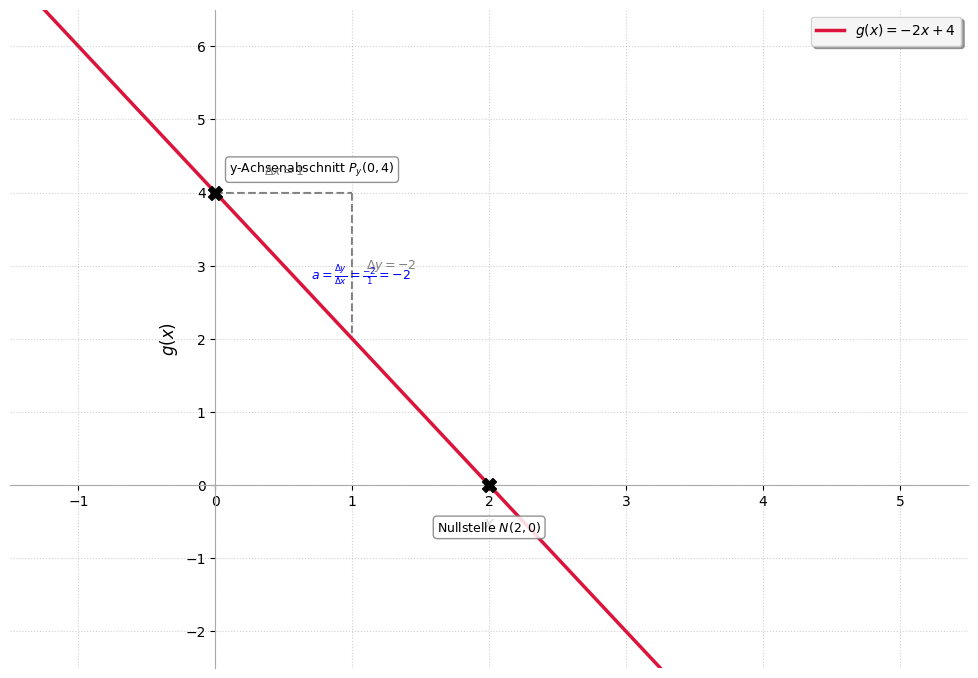

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Definiere die Funktion
def g(x):
    return -2 * x + 4

# x-Werte für die Darstellung der Geraden
x_vals_line = np.linspace(-1.5, 5.5, 400) # Angepasst an die Beschreibung der Skalierung
y_vals_line = g(x_vals_line)

# Wichtige Punkte
# Nullstelle (2,0)
# -2x + 4 = 0 => 2x = 4 => x = 2
nullstelle_x, nullstelle_y = 2, g(2)

# y-Achsenabschnitt (0,4)
y_intercept_x, y_intercept_y = 0, g(0)


# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 7))

# Farben
func_color = 'crimson' # Andere Farbe als die vorherige f(x)
point_color = 'black'
slope_triangle_color = 'gray'
text_color = 'black'

# Funktion plotten
ax.plot(x_vals_line, y_vals_line, color=func_color, linewidth=2.5, label='$g(x) = -2x + 4$', zorder=2)

# Punkte markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.85, lw=1)

# Nullstelle
ax.scatter(nullstelle_x, nullstelle_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'Nullstelle $N({nullstelle_x},{nullstelle_y})$', (nullstelle_x, nullstelle_y),
            textcoords="offset points", xytext=(0, -25), ha='center', va='top', fontsize=9, bbox=bbox_props)

# y-Achsenabschnitt
ax.scatter(y_intercept_x, y_intercept_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'y-Achsenabschnitt $P_y({y_intercept_x},{y_intercept_y})$', (y_intercept_x, y_intercept_y),
            textcoords="offset points", xytext=(10, 10), ha='left', va='bottom', fontsize=9, bbox=bbox_props)

# Steigungsdreieck (z.B. von (0,4) aus: 1 Einheit nach rechts, 2 Einheiten nach unten)
# Startpunkt für Dreieck: y-Achsenabschnitt (0,4)
x_tri_start = y_intercept_x
y_tri_start = y_intercept_y
delta_x_tri = 1.0 # 1 Einheit nach rechts
delta_y_tri = -2.0 * delta_x_tri # Steigung ist -2, also 2 Einheiten nach unten

ax.plot([x_tri_start, x_tri_start + delta_x_tri], [y_tri_start, y_tri_start], color=slope_triangle_color, linestyle='--', lw=1.5, zorder=1) # Horizontale Linie
ax.plot([x_tri_start + delta_x_tri, x_tri_start + delta_x_tri], [y_tri_start, y_tri_start + delta_y_tri], color=slope_triangle_color, linestyle='--', lw=1.5, zorder=1) # Vertikale Linie

ax.text(x_tri_start + delta_x_tri / 2, y_tri_start + 0.2, f'$\\Delta x = {delta_x_tri:.0f}$', ha='center', va='bottom', fontsize=9, color=slope_triangle_color)
ax.text(x_tri_start + delta_x_tri + 0.1, y_tri_start + delta_y_tri / 2, f'$\\Delta y = {delta_y_tri:.0f}$', ha='left', va='center', fontsize=9, color=slope_triangle_color)
ax.text(x_tri_start + delta_x_tri /2 + 0.2, y_tri_start + delta_y_tri /2 - 0.2, '$a = \\frac{\\Delta y}{\\Delta x} = \\frac{-2}{1} = -2$', fontsize=9, color='blue', ha='left')


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$g(x)$', fontsize=12, fontweight='bold')
# ax.set_title("Graph von $g(x) = -2x + 4$", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende (nur für die Funktion selbst)
ax.legend(loc='upper right', fontsize=10, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen (z.B. von -1 bis 5 für x und -2 bis 6 für y)
ax.set_xlim(-1.5, 5.5)
ax.set_ylim(-2.5, 6.5)
ax.set_xticks(np.arange(-1, 6, 1))
ax.set_yticks(np.arange(-2, 7, 1))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('funktion_g_checkliste_graph.png', dpi=300)
    print("Grafik 'funktion_g_checkliste_graph.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'funktion_h_gedankenexperiment_graph.png' wurde erfolgreich erstellt und gespeichert.


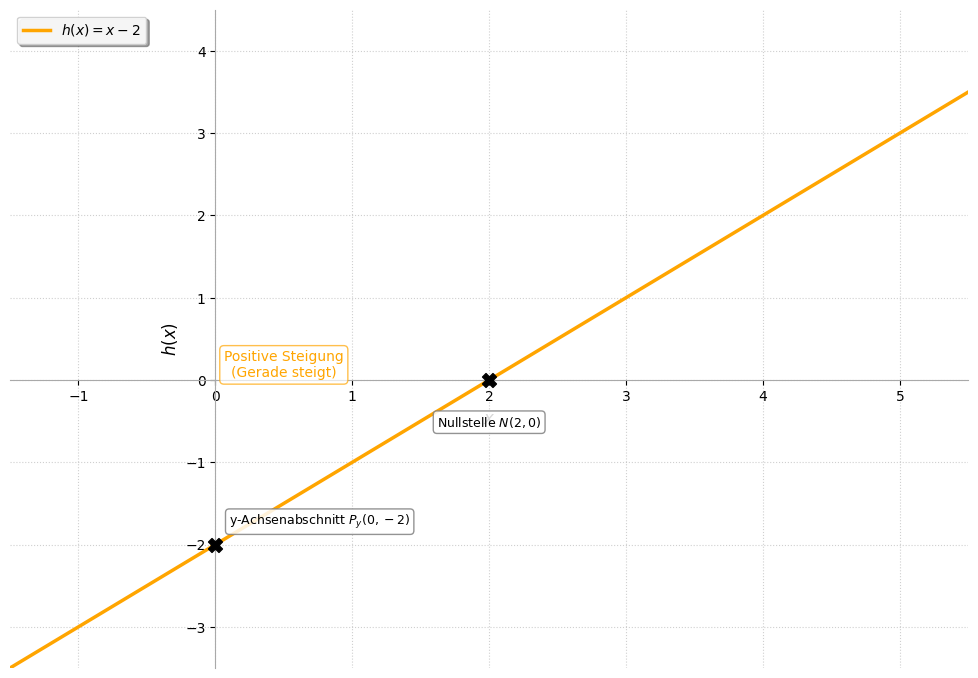

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Definiere die Funktion h(x) = mx + c
# Positive Steigung, z.B. m = 1
# Positive Nullstelle x_h0, z.B. x_h0 = 2
# h(x_h0) = 0 => m*x_h0 + c = 0 => c = -m*x_h0
# Beispiel: m=1, x_h0=2 => c = -2. Also h(x) = x - 2
def h(x):
    return x - 2

# x-Werte für die Darstellung der Geraden
x_vals_line = np.linspace(-1.5, 5.5, 400)
y_vals_line = h(x_vals_line)

# Wichtige Punkte
# Nullstelle (x_h0, 0)
nullstelle_h_x, nullstelle_h_y = 2, h(2) # (2,0)

# y-Achsenabschnitt (0, c)
y_intercept_h_x, y_intercept_h_y = 0, h(0) # (0,-2)


# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 7))

# Farben
func_color = 'orange'
point_color = 'black'
text_color = 'black'

# Funktion plotten
ax.plot(x_vals_line, y_vals_line, color=func_color, linewidth=2.5, label='$h(x) = x - 2$', zorder=2)

# Punkte markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.85, lw=1)

# Nullstelle
ax.scatter(nullstelle_h_x, nullstelle_h_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'Nullstelle $N({nullstelle_h_x},{nullstelle_h_y})$', (nullstelle_h_x, nullstelle_h_y),
            textcoords="offset points", xytext=(0, -25), ha='center', va='top', fontsize=9, bbox=bbox_props)

# y-Achsenabschnitt
ax.scatter(y_intercept_h_x, y_intercept_h_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'y-Achsenabschnitt $P_y({y_intercept_h_x},{y_intercept_h_y})$', (y_intercept_h_x, y_intercept_h_y),
            textcoords="offset points", xytext=(10, 10), ha='left', va='bottom', fontsize=9, bbox=bbox_props)

# Hinweis auf positive Steigung
ax.text(0.5, h(0.5) + 1.5, "Positive Steigung\n(Gerade steigt)", color=func_color,
        fontsize=10, ha='center', va='bottom',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=func_color, alpha=0.7))


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$h(x)$', fontsize=12, fontweight='bold')
# ax.set_title("Lineare Funktion mit positiver Steigung und positiver Nullstelle", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende (nur für die Funktion selbst)
ax.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen (z.B. von -1 bis 5 für x und -3 bis 4 für y, um die Schnitte gut zu zeigen)
ax.set_xlim(-1.5, 5.5)
ax.set_ylim(-3.5, 4.5)
ax.set_xticks(np.arange(-1, 6, 1))
ax.set_yticks(np.arange(-3, 5, 1))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('funktion_h_gedankenexperiment_graph.png', dpi=300)
    print("Grafik 'funktion_h_gedankenexperiment_graph.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'parabeln_vergleich_graph.png' wurde erfolgreich erstellt und gespeichert.


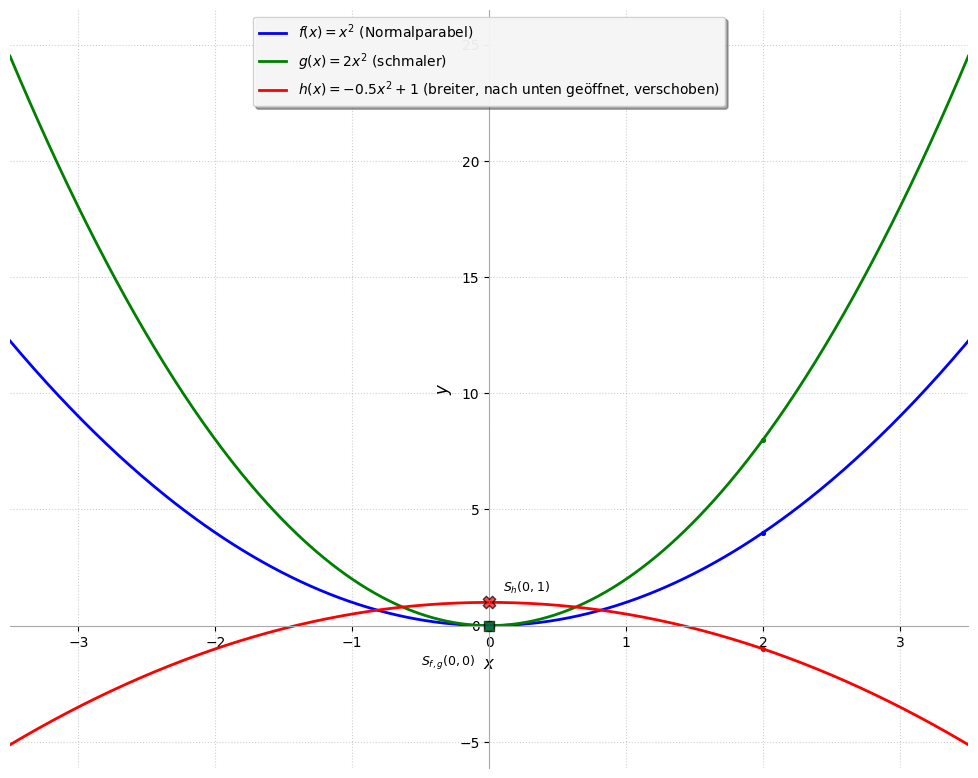

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Definiere die Funktionen
def f1(x):
    return x**2

def f2(x):
    return 2 * x**2

def f3(x):
    return -0.5 * x**2 + 1

# x-Werte für die Darstellung
x_vals = np.linspace(-3.5, 3.5, 400) # Angepasst, um den Verlauf gut zu zeigen

y_f1 = f1(x_vals)
y_f2 = f2(x_vals)
y_f3 = f3(x_vals)

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 8))

# Farben
color_f1 = 'blue'
color_f2 = 'green'
color_f3 = 'red'
point_color = 'black'

# Funktionen plotten
ax.plot(x_vals, y_f1, color=color_f1, linewidth=2, label='$f(x) = x^2$ (Normalparabel)')
ax.plot(x_vals, y_f2, color=color_f2, linewidth=2, label='$g(x) = 2x^2$ (schmaler)')
ax.plot(x_vals, y_f3, color=color_f3, linewidth=2, label='$h(x) = -0.5x^2 + 1$ (breiter, nach unten geöffnet, verschoben)')

# Scheitelpunkte markieren (optional, da sie hier alle bei x=0 liegen oder klar sind)
# S_f1 = (0,0)
# S_f2 = (0,0)
# S_f3 = (0,1)
ax.scatter(0, 0, color=color_f1, marker='o', s=50, zorder=5, edgecolors='black', alpha=0.7)
ax.scatter(0, 0, color=color_f2, marker='s', s=50, zorder=5, edgecolors='black', alpha=0.7) # Anderer Marker für g(x)
ax.scatter(0, 1, color=color_f3, marker='X', s=80, zorder=5, edgecolors='black', alpha=0.7)
ax.annotate('$S_{f,g}(0,0)$', (0,0), textcoords="offset points", xytext=(-10,-20), ha='right', va='top', fontsize=9)
ax.annotate('$S_h(0,1)$', (0,1), textcoords="offset points", xytext=(10,5), ha='left', va='bottom', fontsize=9)


# Beispielpunkte zur Verdeutlichung der Form (optional)
# Für f(x)=x^2: (2,4)
ax.scatter(2, f1(2), color=color_f1, marker='.', s=30, zorder=4)
# Für g(x)=2x^2: (2,8)
ax.scatter(2, f2(2), color=color_f2, marker='.', s=30, zorder=4)
# Für h(x)=-0.5x^2+1: (2,-1)
ax.scatter(2, f3(2), color=color_f3, marker='.', s=30, zorder=4)


ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$y$', fontsize=12, fontweight='bold')
# ax.set_title('Vergleich verschiedener Parabeln', fontsize=14) # Titel auskommentiert
ax.legend(loc='upper center', fontsize=10, frameon=True, framealpha=0.9, shadow=True, ncol=1)
ax.grid(True, linestyle=':', alpha=0.6)
ax.axhline(0, color='black', lw=0.7) # x-Achse
ax.axvline(0, color='black', lw=0.7) # y-Achse

# Achsenlimits anpassen, um alle Graphen gut darzustellen
y_min_overall = min(np.min(y_f1), np.min(y_f2), np.min(y_f3))
y_max_overall = max(np.max(y_f1), np.max(y_f2), np.max(y_f3))

ax.set_xlim(-3.5, 3.5)
ax.set_ylim(y_min_overall - 1, y_max_overall + 2) # Etwas mehr Platz oben für Legende
ax.set_xticks(np.arange(-3, 4, 1))
# ax.set_yticks(np.arange(int(y_min_overall -1), int(y_max_overall + 2), 2))


for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('parabeln_vergleich_graph.png', dpi=300)
    print("Grafik 'parabeln_vergleich_graph.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'kurvendiskussion_kombi_graph.png' wurde erfolgreich erstellt und gespeichert.


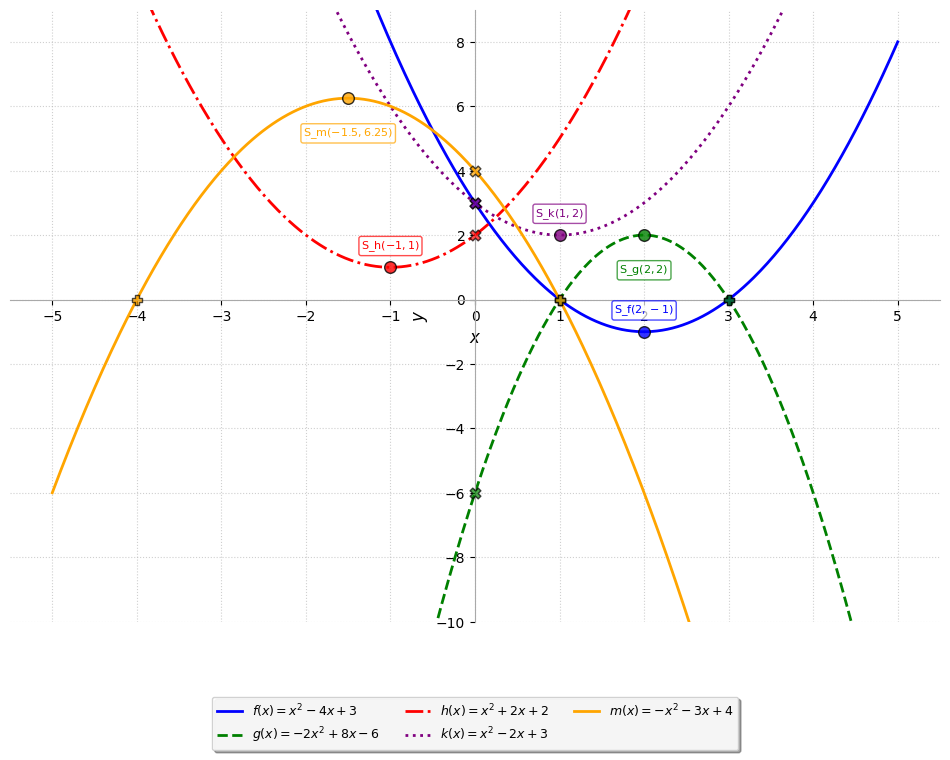

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Definiere die fünf Funktionen
def f(x):
    return x**2 - 4*x + 3

def g(x):
    return -2*x**2 + 8*x - 6

def h(x):
    return x**2 + 2*x + 2

def k_func(x): # Renamed to avoid conflict with matplotlib.pyplot.k
    return x**2 - 2*x + 3

def m_func(x): # Renamed to avoid conflict
    return -x**2 - 3*x + 4

# x-Werte für die Darstellung
x_vals = np.linspace(-5, 5, 500)

y_f = f(x_vals)
y_g = g(x_vals)
y_h = h(x_vals)
y_k = k_func(x_vals)
y_m = m_func(x_vals)

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(12, 9))

# Farben und Linienstile
colors = ['blue', 'green', 'red', 'purple', 'orange']
linestyles = ['-', '--', '-.', ':', '-']
labels = [
    '$f(x) = x^2 - 4x + 3$',
    '$g(x) = -2x^2 + 8x - 6$',
    '$h(x) = x^2 + 2x + 2$',
    '$k(x) = x^2 - 2x + 3$',
    '$m(x) = -x^2 - 3x + 4$'
]
functions = [f, g, h, k_func, m_func]
scheitelpunkte_data = [ # (xs, ys, name)
    (2, -1, 'S_f'),      # f(x)
    (2, 2, 'S_g'),       # g(x)
    (-1, 1, 'S_h'),      # h(x)
    (1, 2, 'S_k'),       # k(x)
    (-1.5, 6.25, 'S_m')  # m(x)
]
y_achsenabschnitte_data = [ # (x,y, name)
    (0,3, 'P_{yf}'), (0,-6, 'P_{yg}'), (0,2, 'P_{yh}'), (0,3, 'P_{yk}'), (0,4, 'P_{ym}')
]
nullstellen_data = { # name: [(x1,y1), (x2,y2), ...]
    'f': [(1,0), (3,0)],
    'g': [(1,0), (3,0)],
    'h': [],
    'k': [],
    'm': [(-4,0), (1,0)]
}


# Funktionen plotten und wichtige Punkte markieren
for i, func_obj in enumerate(functions):
    y_current = func_obj(x_vals)
    ax.plot(x_vals, y_current, color=colors[i], linestyle=linestyles[i], linewidth=2, label=labels[i], zorder=2)

    # Scheitelpunkt markieren
    xs, ys, s_name = scheitelpunkte_data[i]
    ax.scatter(xs, ys, color=colors[i], marker='o', s=70, zorder=5, edgecolors='black', alpha=0.8)
    ax.annotate(f'{s_name}$({xs},{ys})$', (xs, ys), textcoords="offset points",
                xytext=(0, 10 if func_obj(xs+0.1) > ys else -20), # Position anpassen je nach Öffnung
                ha='center', va='bottom' if func_obj(xs+0.1) > ys else 'top',
                fontsize=8, color=colors[i], bbox=dict(boxstyle="round,pad=0.2", fc="white", ec=colors[i], alpha=0.7))

    # y-Achsenabschnitt markieren
    x_py, y_py, py_name = y_achsenabschnitte_data[i]
    ax.scatter(x_py, y_py, color=colors[i], marker='X', s=60, zorder=4, edgecolors='black', alpha=0.7)
    # ax.annotate(f'{py_name}$({x_py},{y_py})$', (x_py, y_py), textcoords="offset points", xytext=(5,5), ha='left', va='bottom', fontsize=7, color=colors[i])


    # Nullstellen markieren (nur wenn vorhanden)
    # Die Namen f,g,h,k,m entsprechen hier den Indizes 0,1,2,3,4
    func_short_name = ['f','g','h','k','m'][i]
    if func_short_name in nullstellen_data and nullstellen_data[func_short_name]:
        for n_idx, (xn, yn) in enumerate(nullstellen_data[func_short_name]):
            ax.scatter(xn, yn, color=colors[i], marker='P', s=60, zorder=4, edgecolors='black', alpha=0.7) # P für Plus/Nullstelle
            # ax.annotate(f'$N_{{{func_short_name}{n_idx+1}}}({xn},{yn})$', (xn, yn), textcoords="offset points", xytext=(0,-15), ha='center', va='top', fontsize=7, color=colors[i])


ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$y$', fontsize=12, fontweight='bold')
# ax.set_title('Vergleich verschiedener Parabeln', fontsize=14) # Titel auskommentiert
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.22), ncol=3, fontsize=9, frameon=True, framealpha=0.9, shadow=True)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)
ax.axhline(0, color='black', lw=0.7, zorder=1) # x-Achse
ax.axvline(0, color='black', lw=0.7, zorder=1) # y-Achse

# Achsenlimits anpassen
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-10, 9)
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-10, 9, 2))


for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

plt.subplots_adjust(bottom=0.2) # Platz für die Legende schaffen

# Grafik speichern
try:
    plt.savefig('kurvendiskussion_kombi_graph.png', dpi=300)
    print("Grafik 'kurvendiskussion_kombi_graph.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'parabeln_teil1_vergleich_a.png' wurde erfolgreich erstellt und gespeichert.


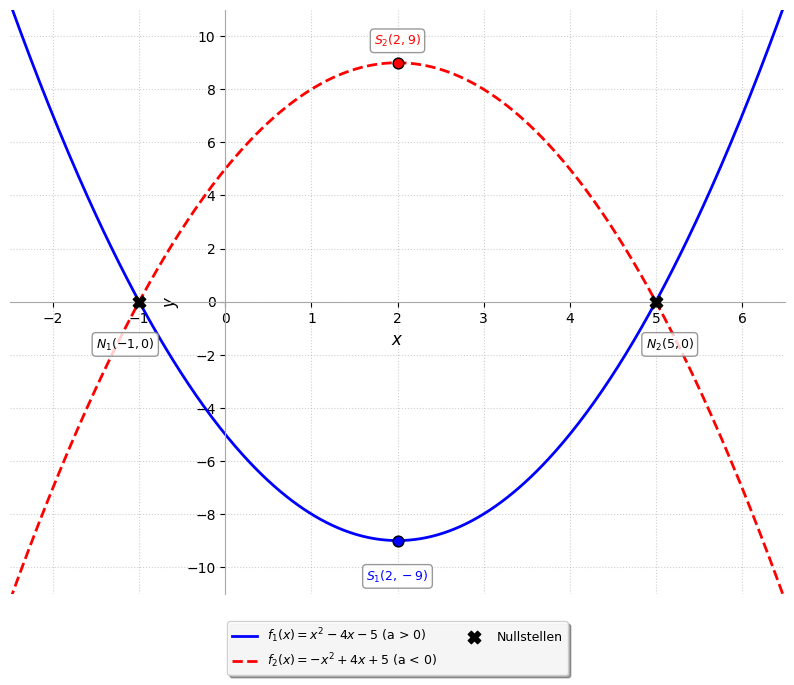

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Definiere die Funktionen
# Fall 1: Nach oben geöffnete Parabel (a > 0) mit Nullstellen bei x = -1 und x = 5
# f1(x) = a(x+1)(x-5). Scheitelpunkt bei x = (-1+5)/2 = 2.
# Um den Scheitelpunkt unterhalb der x-Achse zu haben, muss a > 0 sein.
# z.B. f1(x) = (x+1)(x-5) = x^2 - 4x - 5. Scheitelpunkt S(2, -9)
def f1(x):
    return x**2 - 4*x - 5

# Fall 2: Nach unten geöffnete Parabel (a < 0) mit Nullstellen bei x = -1 und x = 5
# f2(x) = a(x+1)(x-5). Scheitelpunkt bei x = 2.
# Um den Scheitelpunkt oberhalb der x-Achse zu haben, muss a < 0 sein.
# z.B. f2(x) = -(x+1)(x-5) = -x^2 + 4x + 5. Scheitelpunkt S(2, 9)
def f2(x):
    return -x**2 + 4*x + 5

# x-Werte für die Darstellung
x_vals = np.linspace(-2.5, 6.5, 400)

y_f1 = f1(x_vals)
y_f2 = f2(x_vals)

# Wichtige Punkte
# Nullstellen
n1_x, n1_y = -1, 0
n2_x, n2_y = 5, 0

# Scheitelpunkte
s1_x, s1_y = 2, f1(2) # (2, -9)
s2_x, s2_y = 2, f2(2) # (2, 9)

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 8))

# Farben und Linienstile
color_f1 = 'blue'
color_f2 = 'red'
point_color = 'black'
text_color = 'black'

# Funktionen plotten
ax.plot(x_vals, y_f1, color=color_f1, linestyle='-', linewidth=2, label='$f_1(x) = x^2 - 4x - 5$ (a > 0)')
ax.plot(x_vals, y_f2, color=color_f2, linestyle='--', linewidth=2, label='$f_2(x) = -x^2 + 4x + 5$ (a < 0)')

# Punkte markieren und beschriften
marker_style = 'X'
marker_size = 80
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8, lw=1)

# Nullstellen (gemeinsam)
ax.scatter([n1_x, n2_x], [n1_y, n2_y], color=point_color, marker=marker_style, s=marker_size, zorder=5, label='Nullstellen')
ax.annotate(f'$N_1({n1_x},{n1_y})$', (n1_x, n1_y), textcoords="offset points",
            xytext=(-10, -25), ha='center', va='top', fontsize=9, bbox=bbox_props)
ax.annotate(f'$N_2({n2_x},{n2_y})$', (n2_x, n2_y), textcoords="offset points",
            xytext=(10, -25), ha='center', va='top', fontsize=9, bbox=bbox_props)

# Scheitelpunkt S1
ax.scatter(s1_x, s1_y, color=color_f1, marker='o', s=60, zorder=4, edgecolors='black')
ax.annotate(f'$S_1({s1_x},{s1_y})$', (s1_x, s1_y), textcoords="offset points",
            xytext=(0, -20), ha='center', va='top', fontsize=9, color=color_f1, bbox=bbox_props)

# Scheitelpunkt S2
ax.scatter(s2_x, s2_y, color=color_f2, marker='o', s=60, zorder=4, edgecolors='black')
ax.annotate(f'$S_2({s2_x},{s2_y})$', (s2_x, s2_y), textcoords="offset points",
            xytext=(0, 10), ha='center', va='bottom', fontsize=9, color=color_f2, bbox=bbox_props)


ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$y$', fontsize=12, fontweight='bold')
# ax.set_title('Vergleich zweier Parabeln mit gleichen Nullstellen', fontsize=14) # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=9, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen
ax.set_xlim(-2.5, 6.5)
ax.set_ylim(-11, 11)
ax.set_xticks(np.arange(-2, 7, 1))
ax.set_yticks(np.arange(-10, 11, 2))

# Gesamtlayout anpassen
plt.subplots_adjust(bottom=0.15) # Platz für die Legende schaffen

# Grafik speichern
try:
    plt.savefig('parabeln_teil1_vergleich_a.png', dpi=300)
    print("Grafik 'parabeln_teil1_vergleich_a.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'parabeln_teil2_szenarien_ac.png' wurde erfolgreich erstellt und gespeichert.


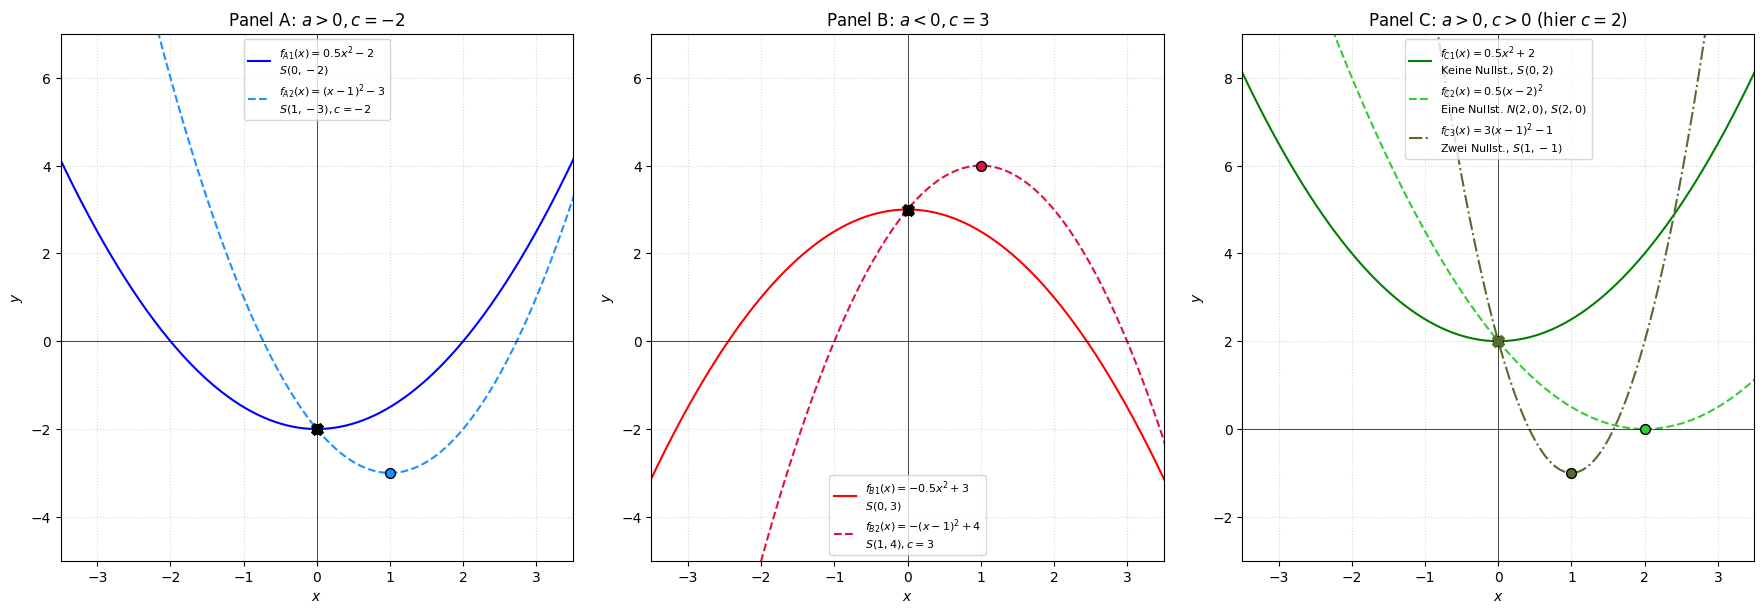

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, axs = plt.subplots(1, 3, figsize=(18, 6.5)) # Drei Subplots nebeneinander

x_range = np.linspace(-4, 4, 400)
common_xlim = (-3.5, 3.5)
common_ylim_A_B = (-5, 7)
common_ylim_C = (-3, 9)

# --- Panel A (für 2a): a > 0, c = -2 ---
axA = axs[0]
c_A = -2

# Parabel A1: S(0, -2) => f(x) = ax^2 - 2. Damit Nullstellen existieren, muss a > 0.
# z.B. a=0.5 => 0.5x^2 - 2 = 0 => x^2 = 4 => x = +/-2
def fA1(x): return 0.5 * x**2 + c_A
yA1 = fA1(x_range)
axA.plot(x_range, yA1, label='$f_{A1}(x) = 0.5x^2 - 2$\n$S(0,-2)$', color='blue', linestyle='-')
axA.scatter(0, c_A, color='blue', marker='o', s=50, zorder=5, edgecolors='black') # Scheitelpunkt

# Parabel A2: S(1, -3) (a > 0, c = -2)
# y = a(x-1)^2 - 3. Bei x=0: y = a(0-1)^2 - 3 = a - 3 = -2 => a = 1
def fA2(x): return 1 * (x - 1)**2 - 3
yA2 = fA2(x_range)
axA.plot(x_range, yA2, label='$f_{A2}(x) = (x-1)^2 - 3$\n$S(1,-3), c=-2$', color='dodgerblue', linestyle='--')
axA.scatter(1, -3, color='dodgerblue', marker='o', s=50, zorder=5, edgecolors='black') # Scheitelpunkt
axA.scatter(0, c_A, color='black', marker='X', s=70, zorder=6) # y-Achsenabschnitt für beide

axA.set_title('Panel A: $a > 0, c = -2$', fontsize=12)
axA.axhline(0, color='black', lw=0.5)
axA.axvline(0, color='black', lw=0.5)
axA.grid(True, linestyle=':', alpha=0.5)
axA.set_xlabel('$x$')
axA.set_ylabel('$y$')
axA.legend(fontsize=8, loc='upper center')
axA.set_xlim(common_xlim)
axA.set_ylim(common_ylim_A_B)

# --- Panel B (für 2b): a < 0, c = 3 ---
axB = axs[1]
c_B = 3

# Parabel B1: S(0, 3) => f(x) = ax^2 + 3. Damit Nullstellen existieren, muss a < 0.
# z.B. a=-0.5 => -0.5x^2 + 3 = 0 => x^2 = 6 => x = +/-sqrt(6)
def fB1(x): return -0.5 * x**2 + c_B
yB1 = fB1(x_range)
axB.plot(x_range, yB1, label='$f_{B1}(x) = -0.5x^2 + 3$\n$S(0,3)$', color='red', linestyle='-')
axB.scatter(0, c_B, color='red', marker='o', s=50, zorder=5, edgecolors='black')

# Parabel B2: S(1, 4) (a < 0, c = 3)
# y = a(x-1)^2 + 4. Bei x=0: y = a(0-1)^2 + 4 = a + 4 = 3 => a = -1
def fB2(x): return -1 * (x - 1)**2 + 4
yB2 = fB2(x_range)
axB.plot(x_range, yB2, label='$f_{B2}(x) = -(x-1)^2 + 4$\n$S(1,4), c=3$', color='crimson', linestyle='--')
axB.scatter(1, 4, color='crimson', marker='o', s=50, zorder=5, edgecolors='black')
axB.scatter(0, c_B, color='black', marker='X', s=70, zorder=6) # y-Achsenabschnitt für beide

axB.set_title('Panel B: $a < 0, c = 3$', fontsize=12)
axB.axhline(0, color='black', lw=0.5)
axB.axvline(0, color='black', lw=0.5)
axB.grid(True, linestyle=':', alpha=0.5)
axB.set_xlabel('$x$')
axB.set_ylabel('$y$')
axB.legend(fontsize=8, loc='lower center')
axB.set_xlim(common_xlim)
axB.set_ylim(common_ylim_A_B)


# --- Panel C (für 2c): a > 0, c > 0 (z.B. c=4) ---
axC = axs[2]
c_C = 2 # y-Achsenabschnitt für alle in Panel C

# C1: Keine Nullstellen (S(0,c_C) => y_S = c_C > 0)
def fC1(x): return 0.5 * x**2 + c_C # a=0.5 > 0
yC1 = fC1(x_range)
axC.plot(x_range, yC1, label='$f_{C1}(x) = 0.5x^2 + 2$\nKeine Nullst., $S(0,2)$', color='green', linestyle='-')
axC.scatter(0, c_C, color='green', marker='o', s=50, zorder=5, edgecolors='black')

# C2: Eine Nullstelle (S(xs, 0), y-Abschnitt bei c_C)
# y = a(x-xs)^2. Bei x=0: y = a*xs^2 = c_C.
# Wähle xs=2, c_C=2 => a*4=2 => a=0.5
def fC2(x): return 0.5 * (x - 2)**2
yC2 = fC2(x_range)
axC.plot(x_range, yC2, label='$f_{C2}(x) = 0.5(x-2)^2$\nEine Nullst. $N(2,0)$, $S(2,0)$', color='limegreen', linestyle='--')
axC.scatter(2, 0, color='limegreen', marker='o', s=50, zorder=5, edgecolors='black') # Scheitelpunkt/Nullstelle
axC.scatter(0, fC2(0), color='limegreen', marker='X', s=70, zorder=6) # y-Achsenabschnitt

# C3: Zwei Nullstellen (S(xs, ys) mit ys < 0, y-Abschnitt bei c_C)
# y = a(x-xs)^2 + ys. Bei x=0: y = a*xs^2 + ys = c_C.
# Wähle xs=1, ys=-1, c_C=2 => a*1 - 1 = 2 => a=3
def fC3(x): return 3 * (x - 1)**2 - 1
yC3 = fC3(x_range)
axC.plot(x_range, yC3, label='$f_{C3}(x) = 3(x-1)^2 - 1$\nZwei Nullst., $S(1,-1)$', color='darkolivegreen', linestyle='-.')
axC.scatter(1, -1, color='darkolivegreen', marker='o', s=50, zorder=5, edgecolors='black') # Scheitelpunkt
axC.scatter(0, fC3(0), color='darkolivegreen', marker='X', s=70, zorder=6) # y-Achsenabschnitt


axC.set_title('Panel C: $a > 0, c > 0$ (hier $c=2$)', fontsize=12)
axC.axhline(0, color='black', lw=0.5)
axC.axvline(0, color='black', lw=0.5)
axC.grid(True, linestyle=':', alpha=0.5)
axC.set_xlabel('$x$')
axC.set_ylabel('$y$')
axC.legend(fontsize=8, loc='upper center')
axC.set_xlim(common_xlim)
axC.set_ylim(common_ylim_C)


# Gesamtlayout anpassen
plt.tight_layout(pad=2.0, h_pad=3.0)

# Grafik speichern
try:
    plt.savefig('parabeln_teil2_szenarien_ac.png', dpi=300)
    print("Grafik 'parabeln_teil2_szenarien_ac.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'temperaturverlauf_graph.png' wurde erfolgreich erstellt und gespeichert.


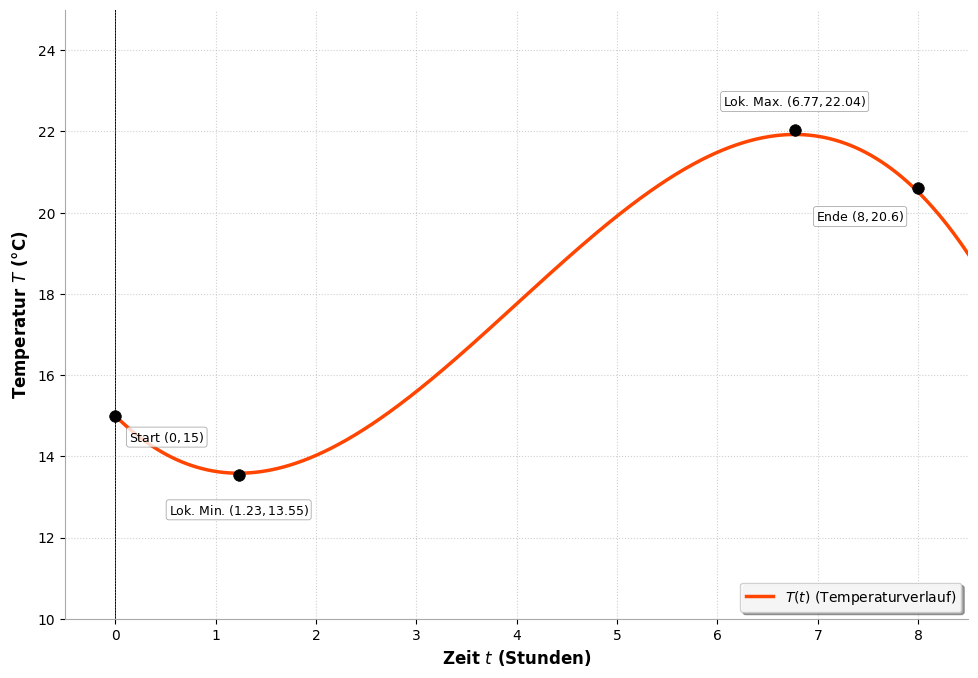

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Definiere die Funktion T(t) - ein Polynom 3. Grades, das die Punkte ungefähr trifft.
# Die genaue Formel ist nicht gegeben, wir konstruieren eine, die passt.
# T(t) = at^3 + bt^2 + ct + d
# T(0) = 15 => d = 15
# T'(t) = 3at^2 + 2bt + c
# T'(1.23) = 0
# T'(6.77) = 0
# T(1.23) = 13.55
# T(6.77) = 22.04
# T(8) = 20.6
# Lösen dieses Gleichungssystems ist aufwendig. Wir nehmen eine passende Beispiel-Funktion.
# Beispiel: T(t) = A*(t-t_min)*(t-t_max)*(t-t_extra) + Verschiebung
# Einfacher: Wir nehmen eine Funktion, die die qualitativen Eigenschaften zeigt.
# z.B. T(t) = -0.2*t**3 + 2.4*t**2 - 6*t + 15 (Dies ist eine Annäherung)
def T(t):
    # Diese Koeffizienten sind so gewählt, dass sie die qualitativen Merkmale
    # (Start, Min, Max, Endpunkt) ungefähr treffen.
    # Eine exakte Anpassung würde das Lösen eines Gleichungssystems erfordern.
    # Für die Skizze ist eine qualitative Übereinstimmung wichtiger.
    # T(t) = at^3 + bt^2 + ct + d
    # Punkte: (0,15), Min(1.23, 13.55), Max(6.77, 22.04), (8, 20.6)
    # d = 15
    # Wir verwenden eine vereinfachte Form, die den qualitativen Verlauf zeigt.
    # f'(x) = k(x-1.23)(x-6.77) = k(x^2 - 8x + 8.3271)
    # f(x) = k(x^3/3 - 4x^2 + 8.3271x) + C
    # f(0)=15 => C=15
    # f(1.23) = k(1.23^3/3 - 4*1.23^2 + 8.3271*1.23) + 15 = 13.55 => k*4.925 + 15 = 13.55 => k = -1.45/4.925 = -0.2944
    # f(6.77) = -0.2944*(6.77^3/3 - 4*6.77^2 + 8.3271*6.77) + 15
    #         = -0.2944*(103.35 - 183.33 + 56.33) + 15
    #         = -0.2944*(-23.65) + 15 = 6.96 + 15 = 21.96 (nahe an 22.04)
    # f(8)    = -0.2944*(8^3/3 - 4*8^2 + 8.3271*8) + 15
    #         = -0.2944*(170.67 - 256 + 66.6168) + 15
    #         = -0.2944*(-18.71) + 15 = 5.508 + 15 = 20.508 (nahe an 20.6)
    k_val = -0.2944
    return k_val * (t**3 / 3 - 4 * t**2 + 8.3271 * t) + 15


# t-Werte für die Darstellung der Kurve
t_vals_line = np.linspace(0, 8.5, 500) # Etwas über 8 für Darstellung
y_vals_line = T(t_vals_line)

# Wichtige Punkte gemäß Beschreibung
p_start = (0, 15)
p_min = (1.23, 13.55) # Gegebene Werte
p_max = (6.77, 22.04) # Gegebene Werte
p_end = (8, 20.6)   # Gegebener Wert

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 7))

# Farben
func_color = 'orangered'
point_color = 'black'
text_color = 'black'

# Funktion plotten
ax.plot(t_vals_line, y_vals_line, color=func_color, linewidth=2.5, label='$T(t)$ (Temperaturverlauf)', zorder=2)

# Punkte markieren und beschriften
marker_style = 'o' # 'X' für Punkte, 'o' für Extrema/Wendepunkte
marker_size = 70
bbox_props = dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.80, lw=0.5)

points_to_plot = [p_start, p_min, p_max, p_end]
labels_for_points = [
    f'Start $(0,15)$',
    f'Lok. Min. $({p_min[0]:.2f},{p_min[1]:.2f})$',
    f'Lok. Max. $({p_max[0]:.2f},{p_max[1]:.2f})$',
    f'Ende $(8,{p_end[1]:.1f})$'
]
text_offsets = [(10, -10), (0, -20), (0, 15), (-10, -15)]
text_alignments_ha = ['left', 'center', 'center', 'right']
text_alignments_va = ['top', 'top', 'bottom', 'top']


for i, (pt_x, pt_y) in enumerate(points_to_plot):
    ax.scatter(pt_x, pt_y, color=point_color, marker=marker_style, s=marker_size, zorder=5, edgecolors='black', linewidth=0.5)
    ax.annotate(labels_for_points[i], (pt_x, pt_y), textcoords="offset points",
                xytext=text_offsets[i], ha=text_alignments_ha[i], va=text_alignments_va[i],
                fontsize=9, bbox=bbox_props)

# Achsen und Titel
ax.set_xlabel('Zeit $t$ (Stunden)', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperatur $T$ (°C)', fontsize=12, fontweight='bold')
# ax.set_title("Skizze des Temperaturverlaufs $T(t)$", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0) # Horizontale Achse (nicht unbedingt bei T=0 relevant)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0) # Vertikale Achse
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
# ax.spines['left'].set_position('zero') # Nicht sinnvoll, da T nicht bei 0 beginnt
# ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende
ax.legend(loc='lower right', fontsize=10, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen (t-Achse von 0 bis 8, T-Achse von ca. 10 bis 25)
ax.set_xlim(-0.5, 8.5)
ax.set_ylim(10, 25)
ax.set_xticks(np.arange(0, 9, 1))
ax.set_yticks(np.arange(10, 26, 2))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('temperaturverlauf_graph.png', dpi=300)
    print("Grafik 'temperaturverlauf_graph.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'fa_kruemmung_a_pos2.png' wurde erfolgreich erstellt und gespeichert.


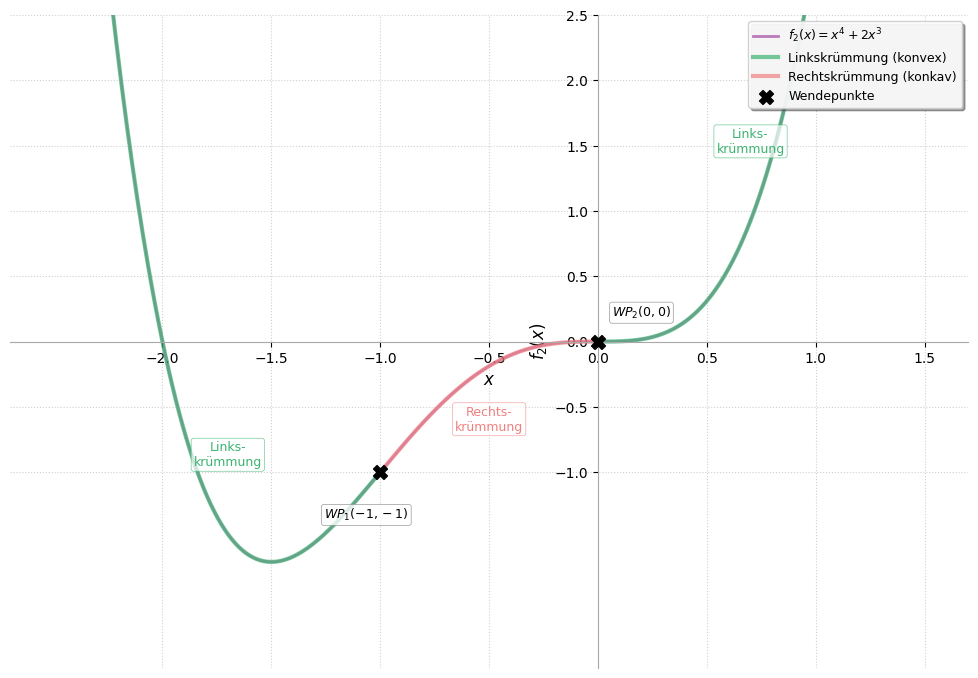

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Definiere die Funktion
def f2(x):
    return x**4 + 2*x**3

# x-Werte für die Darstellung der Kurve
x_vals_line = np.linspace(-2.5, 1.5, 500)
y_vals_line = f2(x_vals_line)

# Wendepunkte WP1(-1, -1) und WP2(0, 0)
# f'(x) = 4x^3 + 6x^2
# f''(x) = 12x^2 + 12x = 12x(x+1)
# f''(x) = 0 => x=0 oder x=-1
wp1_x, wp1_y = -1, f2(-1) # f2(-1) = 1 - 2 = -1
wp2_x, wp2_y = 0, f2(0)   # f2(0) = 0

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 7))

# Farben
func_color = 'purple'
point_color = 'black'
text_color = 'black'
kr_links_color = 'mediumseagreen' # Linkskrümmung (konvex)
kr_rechts_color = 'lightcoral'   # Rechtskrümmung (konkav)
kr_links2_color = 'mediumseagreen'


# Funktion plotten
ax.plot(x_vals_line, y_vals_line, color=func_color, linewidth=2.0, label='$f_2(x) = x^4 + 2x^3$', zorder=1, alpha=0.5)

# Krümmungsbereiche hervorheben
# Linkskrümmung für x < -1
x_lk1 = x_vals_line[x_vals_line < wp1_x]
y_lk1 = f2(x_lk1)
ax.plot(x_lk1, y_lk1, color=kr_links_color, linewidth=3.0, alpha=0.7, zorder=2, label='Linkskrümmung (konvex)')

# Rechtskrümmung für -1 < x < 0
x_rk = x_vals_line[(x_vals_line >= wp1_x) & (x_vals_line <= wp2_x)]
y_rk = f2(x_rk)
ax.plot(x_rk, y_rk, color=kr_rechts_color, linewidth=3.0, alpha=0.7, zorder=2, label='Rechtskrümmung (konkav)')

# Linkskrümmung für x > 0
x_lk2 = x_vals_line[x_vals_line > wp2_x]
y_lk2 = f2(x_lk2)
ax.plot(x_lk2, y_lk2, color=kr_links2_color, linewidth=3.0, alpha=0.7, zorder=2) # Keine extra Legende für den zweiten Teil


# Wendepunkte markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.80, lw=0.5)

ax.scatter([wp1_x, wp2_x], [wp1_y, wp2_y], color=point_color, marker=marker_style, s=marker_size, zorder=5, label='Wendepunkte')
ax.annotate(f'$WP_1({wp1_x},{wp1_y})$', (wp1_x, wp1_y), textcoords="offset points",
            xytext=(-10, -25), ha='center', va='top', fontsize=9, bbox=bbox_props)
ax.annotate(f'$WP_2({wp2_x},{wp2_y})$', (wp2_x, wp2_y), textcoords="offset points",
            xytext=(10, 15), ha='left', va='bottom', fontsize=9, bbox=bbox_props)

# Textbeschriftungen für Krümmung
text_bbox_kr = dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7, lw=0.5)
ax.text(-1.7, f2(-1.7)+0.5, "Links-\nkrümmung", color=kr_links_color, fontsize=9, ha='center', va='bottom', bbox={**text_bbox_kr, 'ec':kr_links_color})
ax.text(-0.5, f2(-0.5)-0.3, "Rechts-\nkrümmung", color=kr_rechts_color, fontsize=9, ha='center', va='top', bbox={**text_bbox_kr, 'ec':kr_rechts_color})
ax.text(0.7, f2(0.7)+0.5, "Links-\nkrümmung", color=kr_links2_color, fontsize=9, ha='center', va='bottom', bbox={**text_bbox_kr, 'ec':kr_links2_color})


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$f_2(x)$', fontsize=12, fontweight='bold')
# ax.set_title("Krümmungsverhalten von $f_2(x)=x^4+2x^3$", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende
handles, labels = plt.gca().get_legend_handles_labels()
# Nur die ersten 4 Labels (Funktion, Linkskr., Rechtskr., WP)
# Um Dopplung von "Linkskrümmung" zu vermeiden
unique_labels = {}
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels[label] = handle
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper right', fontsize=9, frameon=True, framealpha=0.9, shadow=True)


# Achsenlimits anpassen
ax.set_xlim(-2.7, 1.7)
ax.set_ylim(-2.5, 2.5)
ax.set_xticks(np.arange(-2, 2, 0.5))
ax.set_yticks(np.arange(-1, 3, 0.5))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('fa_kruemmung_a_pos2.png', dpi=300)
    print("Grafik 'fa_kruemmung_a_pos2.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'fa_kruemmung_a_neg2.png' wurde erfolgreich erstellt und gespeichert.


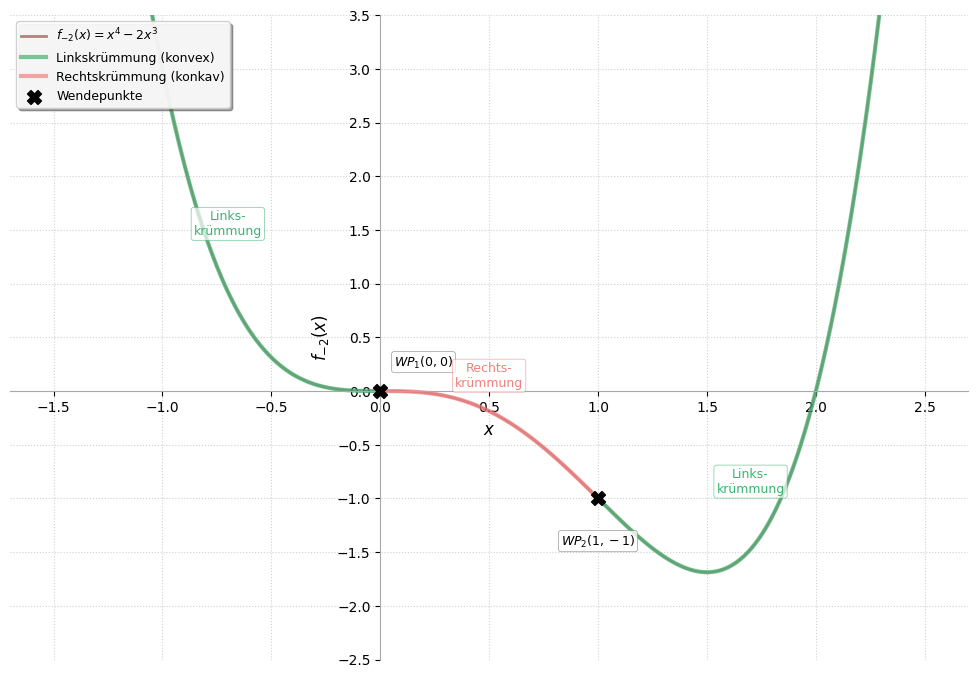

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Definiere die Funktion
def f_neg2(x):
    return x**4 - 2*x**3

# x-Werte für die Darstellung der Kurve
x_vals_line = np.linspace(-1.5, 2.5, 500)
y_vals_line = f_neg2(x_vals_line)

# Wendepunkte WP1(0, 0) und WP2(1, -1)
# f'(x) = 4x^3 - 6x^2
# f''(x) = 12x^2 - 12x = 12x(x-1)
# f''(x) = 0 => x=0 oder x=1
wp1_x, wp1_y = 0, f_neg2(0)   # f_neg2(0) = 0
wp2_x, wp2_y = 1, f_neg2(1) # f_neg2(1) = 1 - 2 = -1


# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 7))

# Farben
func_color = 'darkred' # Geänderte Farbe für die neue Funktion
point_color = 'black'
text_color = 'black'
# Krümmungsfarben: f''(x) = 12x(x-1)
# x < 0: (+)(-)(-) = + (Linkskrümmung)
# 0 < x < 1: (+)(+)(-) = - (Rechtskrümmung)
# x > 1: (+)(+)(+) = + (Linkskrümmung)
kr_links_color1 = 'mediumseagreen'
kr_rechts_color = 'lightcoral'
kr_links_color2 = 'mediumseagreen'


# Funktion plotten (Grundlinie)
ax.plot(x_vals_line, y_vals_line, color=func_color, linewidth=2.0, label='$f_{-2}(x) = x^4 - 2x^3$', zorder=1, alpha=0.5)

# Krümmungsbereiche hervorheben
# Linkskrümmung für x < 0
x_lk1 = x_vals_line[x_vals_line < wp1_x]
y_lk1 = f_neg2(x_lk1)
ax.plot(x_lk1, y_lk1, color=kr_links_color1, linewidth=3.0, alpha=0.7, zorder=2, label='Linkskrümmung (konvex)')

# Rechtskrümmung für 0 < x < 1
x_rk = x_vals_line[(x_vals_line >= wp1_x) & (x_vals_line <= wp2_x)]
y_rk = f_neg2(x_rk)
ax.plot(x_rk, y_rk, color=kr_rechts_color, linewidth=3.0, alpha=0.7, zorder=2, label='Rechtskrümmung (konkav)')

# Linkskrümmung für x > 1
x_lk2 = x_vals_line[x_vals_line > wp2_x]
y_lk2 = f_neg2(x_lk2)
ax.plot(x_lk2, y_lk2, color=kr_links_color2, linewidth=3.0, alpha=0.7, zorder=2) # Keine extra Legende für den zweiten Teil


# Wendepunkte markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.80, lw=0.5)

ax.scatter([wp1_x, wp2_x], [wp1_y, wp2_y], color=point_color, marker=marker_style, s=marker_size, zorder=5, label='Wendepunkte')
ax.annotate(f'$WP_1({wp1_x},{wp1_y})$', (wp1_x, wp1_y), textcoords="offset points",
            xytext=(10, 15), ha='left', va='bottom', fontsize=9, bbox=bbox_props)
ax.annotate(f'$WP_2({wp2_x},{wp2_y})$', (wp2_x, wp2_y), textcoords="offset points",
            xytext=(0, -25), ha='center', va='top', fontsize=9, bbox=bbox_props)

# Textbeschriftungen für Krümmung
text_bbox_kr = dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7, lw=0.5)
ax.text(-0.7, f_neg2(-0.7) + 0.5, "Links-\nkrümmung", color=kr_links_color1, fontsize=9, ha='center', va='bottom', bbox={**text_bbox_kr, 'ec':kr_links_color1})
ax.text(0.5, f_neg2(0.5) + 0.2, "Rechts-\nkrümmung", color=kr_rechts_color, fontsize=9, ha='center', va='bottom', bbox={**text_bbox_kr, 'ec':kr_rechts_color})
ax.text(1.7, f_neg2(1.7) + 0.5, "Links-\nkrümmung", color=kr_links_color2, fontsize=9, ha='center', va='bottom', bbox={**text_bbox_kr, 'ec':kr_links_color2})


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$f_{-2}(x)$', fontsize=12, fontweight='bold')
# ax.set_title("Krümmungsverhalten von $f_{-2}(x)=x^4-2x^3$", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = {}
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels[label] = handle
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=9, frameon=True, framealpha=0.9, shadow=True)


# Achsenlimits anpassen
ax.set_xlim(-1.7, 2.7)
ax.set_ylim(-1.5, 3.5)
ax.set_xticks(np.arange(-1.5, 2.6, 0.5))
ax.set_yticks(np.arange(-2.5, 3.6, 0.5))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('fa_kruemmung_a_neg2.png', dpi=300)
    print("Grafik 'fa_kruemmung_a_neg2.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


<ipython-input-24-65d609926769>:118: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_curr.legend(fontsize=8, loc='best')
<ipython-input-24-65d609926769>:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=2.0)


Grafik 'kurvendiskussionen_alle_graphen.png' wurde erfolgreich erstellt und gespeichert.


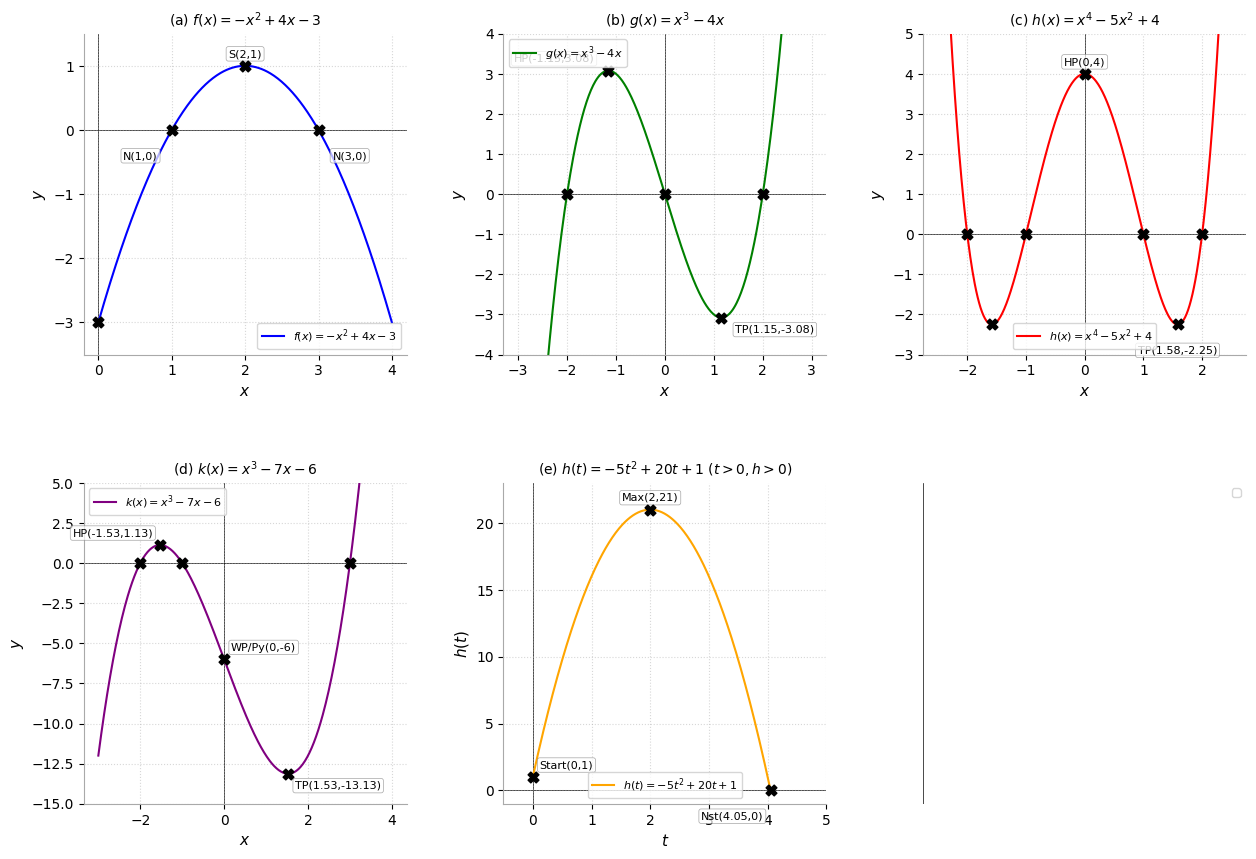

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.3) # 2 Zeilen, 3 Spalten
axs = gs.subplots() # Erzeugt ein Array von Axes-Objekten

point_marker = 'X'
point_size = 60
point_color = 'black'
bbox_props = dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7, lw=0.5)
fontsize_annot = 8

# --- (a) f(x) = -x^2 + 4x - 3 ---
ax_a = axs[0, 0]
def f_a(x): return -x**2 + 4*x - 3
x_a = np.linspace(0, 4, 400)
y_a = f_a(x_a)
ax_a.plot(x_a, y_a, label='$f(x)=-x^2+4x-3$', color='blue')
# Punkte: S(2,1), N1(1,0), N2(3,0), Py(0,-3)
ax_a.scatter([2, 1, 3, 0], [1, 0, 0, -3], color=point_color, marker=point_marker, s=point_size, zorder=5)
ax_a.annotate("S(2,1)", (2,1), xytext=(0,5), textcoords='offset points', ha='center', va='bottom', fontsize=fontsize_annot, bbox=bbox_props)
ax_a.annotate("N(1,0)", (1,0), xytext=(-10,-15), textcoords='offset points', ha='right', va='top', fontsize=fontsize_annot, bbox=bbox_props)
ax_a.annotate("N(3,0)", (3,0), xytext=(10,-15), textcoords='offset points', ha='left', va='top', fontsize=fontsize_annot, bbox=bbox_props)
ax_a.set_title('(a) $f(x)=-x^2+4x-3$', fontsize=10)
ax_a.set_ylim(-3.5, 1.5)

# --- (b) g(x) = x^3 - 4x ---
ax_b = axs[0, 1]
def f_b(x): return x**3 - 4*x
x_b = np.linspace(-3, 3, 400)
y_b = f_b(x_b)
ax_b.plot(x_b, y_b, label='$g(x)=x^3-4x$', color='green')
# Punkte: N(-2,0),(0,0),(2,0), HP(-1.15, 3.08), TP(1.15, -3.08)
hp_b_x, hp_b_y = -2/np.sqrt(3), f_b(-2/np.sqrt(3)) # ca. -1.15, 3.08
tp_b_x, tp_b_y = 2/np.sqrt(3), f_b(2/np.sqrt(3)) # ca. 1.15, -3.08
ax_b.scatter([-2,0,2, hp_b_x, tp_b_x], [0,0,0, hp_b_y, tp_b_y], color=point_color, marker=point_marker, s=point_size, zorder=5)
ax_b.annotate(f"HP({hp_b_x:.2f},{hp_b_y:.2f})", (hp_b_x,hp_b_y), xytext=(-10,5), textcoords='offset points', ha='right', va='bottom', fontsize=fontsize_annot, bbox=bbox_props)
ax_b.annotate(f"TP({tp_b_x:.2f},{tp_b_y:.2f})", (tp_b_x,tp_b_y), xytext=(10,-5), textcoords='offset points', ha='left', va='top', fontsize=fontsize_annot, bbox=bbox_props)
ax_b.set_title('(b) $g(x)=x^3-4x$', fontsize=10)
ax_b.set_ylim(-4, 4)

# --- (c) h(x) = x^4 - 5x^2 + 4 ---
ax_c = axs[0, 2]
def f_c(x): return x**4 - 5*x**2 + 4
x_c = np.linspace(-2.5, 2.5, 400)
y_c = f_c(x_c)
ax_c.plot(x_c, y_c, label='$h(x)=x^4-5x^2+4$', color='red')
# Punkte: N(-2,0),(-1,0),(1,0),(2,0), HP(0,4), TPs(+-sqrt(2.5), -2.25)
tp_c_x = np.sqrt(2.5)
ax_c.scatter([-2,-1,0,1,2, -tp_c_x, tp_c_x], [0,0,4,0,0, f_c(tp_c_x), f_c(tp_c_x)], color=point_color, marker=point_marker, s=point_size, zorder=5)
ax_c.annotate("HP(0,4)", (0,4), xytext=(0,5), textcoords='offset points', ha='center', va='bottom', fontsize=fontsize_annot, bbox=bbox_props)
ax_c.annotate(f"TP({tp_c_x:.2f},{-2.25})", (tp_c_x,-2.25), xytext=(0,-15), textcoords='offset points', ha='center', va='top', fontsize=fontsize_annot, bbox=bbox_props)
ax_c.set_title('(c) $h(x)=x^4-5x^2+4$', fontsize=10)
ax_c.set_ylim(-3, 5)

# --- (d) k(x) = x^3 - 7x - 6 ---
ax_d = axs[1, 0]
def f_d(x): return x**3 - 7*x - 6
x_d = np.linspace(-3, 4, 400)
y_d = f_d(x_d)
ax_d.plot(x_d, y_d, label='$k(x)=x^3-7x-6$', color='purple')
# N(-2,0),(-1,0),(3,0), WP/Py(0,-6), HP(-sqrt(7/3), 1.13), TP(sqrt(7/3), -13.13)
hp_d_x, hp_d_y = -np.sqrt(7/3), f_d(-np.sqrt(7/3)) # ca. -1.53, 1.13
tp_d_x, tp_d_y = np.sqrt(7/3), f_d(np.sqrt(7/3))   # ca. 1.53, -13.13
ax_d.scatter([-2,-1,0,3, hp_d_x, tp_d_x], [0,0,-6,0, hp_d_y, tp_d_y], color=point_color, marker=point_marker, s=point_size, zorder=5)
ax_d.annotate(f"HP({hp_d_x:.2f},{hp_d_y:.2f})", (hp_d_x,hp_d_y), xytext=(-5,5), textcoords='offset points', ha='right', va='bottom', fontsize=fontsize_annot, bbox=bbox_props)
ax_d.annotate(f"TP({tp_d_x:.2f},{tp_d_y:.2f})", (tp_d_x,tp_d_y), xytext=(5,-5), textcoords='offset points', ha='left', va='top', fontsize=fontsize_annot, bbox=bbox_props)
ax_d.annotate("WP/Py(0,-6)", (0,-6), xytext=(5,5), textcoords='offset points', ha='left', va='bottom', fontsize=fontsize_annot, bbox=bbox_props)
ax_d.set_title('(d) $k(x)=x^3-7x-6$', fontsize=10)
ax_d.set_ylim(-15, 5)

# --- (e) h_t(t) = -5t^2 + 20t + 1 ---
ax_e = axs[1, 1]
def f_e(t): return -5*t**2 + 20*t + 1
t_e = np.linspace(0, 4.5, 400) # t>=0
y_e = f_e(t_e)
# Nur plotten wo h>=0
y_e_plot = np.where(y_e >= 0, y_e, np.nan)
ax_e.plot(t_e, y_e_plot, label='$h(t)=-5t^2+20t+1$', color='orange')
# Start(0,1), Max(2,21), Nst_t ca. 4.05
nst_e_t = (20 + np.sqrt(400 - 4*(-5)*1))/(-10) # (20+sqrt(420))/-10. sqrt(420) ca 20.49
nst_e_t_pos = (20 + np.sqrt(420))/10 # Positive Nullstelle, da -5t^2
# Korrektur: Nst ist (20+sqrt(420))/10 für die Funktion -5t^2+20t+1 = 0
# t = (-20 +- sqrt(400 - 4*(-5)*1)) / -10 = (-20 +- sqrt(420)) / -10 = 2 -+ sqrt(4.2)
# Nst_pos = 2 + np.sqrt(4.2) ca 2 + 2.049 = 4.049
nst_e_t_val = 2 + np.sqrt(4.2)
ax_e.scatter([0, 2, nst_e_t_val], [1, 21, 0], color=point_color, marker=point_marker, s=point_size, zorder=5)
ax_e.annotate("Start(0,1)", (0,1), xytext=(5,5), textcoords='offset points', ha='left', va='bottom', fontsize=fontsize_annot, bbox=bbox_props)
ax_e.annotate("Max(2,21)", (2,21), xytext=(0,5), textcoords='offset points', ha='center', va='bottom', fontsize=fontsize_annot, bbox=bbox_props)
ax_e.annotate(f"Nst({nst_e_t_val:.2f},0)", (nst_e_t_val,0), xytext=(-5,-15), textcoords='offset points', ha='right', va='top', fontsize=fontsize_annot, bbox=bbox_props)
ax_e.set_title('(e) $h(t)=-5t^2+20t+1$ ($t > 0, h > 0$)', fontsize=10)
ax_e.set_xlabel('$t$', fontsize=11)
ax_e.set_ylabel('$h(t)$', fontsize=11)
ax_e.set_xlim(-0.5, 5)
ax_e.set_ylim(-1, 23)


# Letzten Subplot (axs[1,2]) ausblenden
axs[1, 2].axis('off')

# Allgemeine Einstellungen für alle Subplots
for ax_curr in axs.flat:
    if ax_curr.get_figure() is None: continue # Überspringe den leeren Subplot
    if ax_curr.get_xlabel() == "": # Nur wenn noch kein Label gesetzt (für ax_e)
        ax_curr.set_xlabel('$x$', fontsize=11)
    if ax_curr.get_ylabel() == "":
        ax_curr.set_ylabel('$y$', fontsize=11)
    ax_curr.axhline(0, color='black', lw=0.5, zorder=0)
    ax_curr.axvline(0, color='black', lw=0.5, zorder=0)
    ax_curr.grid(True, linestyle=':', alpha=0.5, zorder=0)
    ax_curr.legend(fontsize=8, loc='best')
    for spine in ax_curr.spines.values():
        spine.set_edgecolor('darkgrey')
    # ax_curr.spines['left'].set_position('zero') # Kann bei variablen Achsen unschön sein
    # ax_curr.spines['bottom'].set_position('zero')
    ax_curr.spines['right'].set_color('none')
    ax_curr.spines['top'].set_color('none')


# Gesamtlayout anpassen
# plt.tight_layout(pad=2.0) # tight_layout kann mit gridspec manchmal Probleme machen
fig.tight_layout(pad=2.0)


# Grafik speichern
try:
    plt.savefig('kurvendiskussionen_alle_graphen.png', dpi=300)
    print("Grafik 'kurvendiskussionen_alle_graphen.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'funktionen_neg_exp_kombi_graph.png' wurde erfolgreich erstellt und gespeichert.


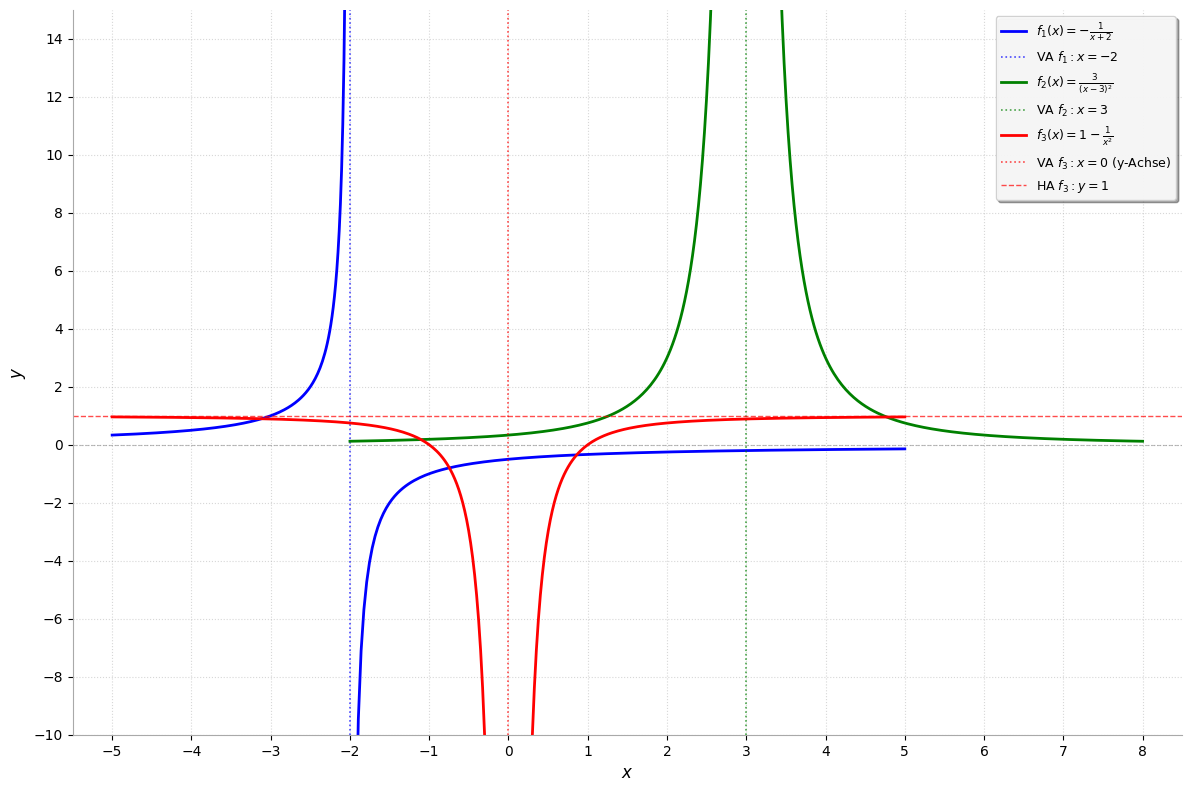

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(12, 8))

# x-Werte Bereiche definieren, um Asymptoten zu umgehen
epsilon = 1e-6 # Kleiner Wert, um Division durch Null zu vermeiden

# --- Funktion 1: f1(x) = -1/(x+2) ---
def f1(x):
    return np.where(np.abs(x + 2) < epsilon, np.nan, -1 / (x + 2))

x1_left = np.linspace(-5, -2 - epsilon, 200)
x1_right = np.linspace(-2 + epsilon, 5, 200)
ax.plot(x1_left, f1(x1_left), color='blue', linewidth=2, label='$f_1(x) = -\\frac{1}{x+2}$')
ax.plot(x1_right, f1(x1_right), color='blue', linewidth=2)
# Asymptoten für f1
ax.axvline(-2, color='blue', linestyle=':', linewidth=1.2, alpha=0.7, label='VA $f_1: x=-2$')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5) # HA bei y=0 (gemeinsam für f1, f2)

# --- Funktion 2: f2(x) = 3/((x-3)^2) ---
def f2(x):
    return np.where(np.abs(x - 3) < epsilon, np.nan, 3 / ((x - 3)**2))

x2_left = np.linspace(-2, 3 - epsilon, 200)
x2_right = np.linspace(3 + epsilon, 8, 200) # x-Bereich erweitert für f2
ax.plot(x2_left, f2(x2_left), color='green', linewidth=2, label='$f_2(x) = \\frac{3}{(x-3)^2}$')
ax.plot(x2_right, f2(x2_right), color='green', linewidth=2)
# Asymptoten für f2
ax.axvline(3, color='green', linestyle=':', linewidth=1.2, alpha=0.7, label='VA $f_2: x=3$')

# --- Funktion 3: f3(x) = 1 - 1/x^2 ---
def f3(x):
    return np.where(np.abs(x) < epsilon, np.nan, 1 - 1 / (x**2))

x3_left = np.linspace(-5, 0 - epsilon, 200)
x3_right = np.linspace(0 + epsilon, 5, 200)
ax.plot(x3_left, f3(x3_left), color='red', linewidth=2, label='$f_3(x) = 1 - \\frac{1}{x^2}$')
ax.plot(x3_right, f3(x3_right), color='red', linewidth=2)
# Asymptoten für f3
ax.axvline(0, color='red', linestyle=':', linewidth=1.2, alpha=0.7, label='VA $f_3: x=0$ (y-Achse)')
ax.axhline(1, color='red', linestyle='--', linewidth=1.0, alpha=0.7, label='HA $f_3: y=1$')


# Allgemeine Plot-Einstellungen
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$y$', fontsize=12, fontweight='bold')
# ax.set_title('Graphen von $f_1(x)$, $f_2(x)$ und $f_3(x)$ mit Asymptoten', fontsize=14) # Titel auskommentiert
ax.legend(loc='best', fontsize=9, frameon=True, framealpha=0.9, shadow=True)
ax.grid(True, linestyle=':', alpha=0.5, zorder=0)

# Achsen (Hauptachsen bei 0,0, falls nicht schon durch Asymptoten abgedeckt)
# ax.axhline(0, color='black', lw=0.7, zorder=0) # Bereits durch HA f1,f2 abgedeckt
# ax.axvline(0, color='black', lw=0.7, zorder=0) # Bereits durch VA f3 abgedeckt

# Achsenlimits anpassen, um alle Funktionen gut darzustellen
ax.set_xlim(-5.5, 8.5)
ax.set_ylim(-10, 15)
ax.set_xticks(np.arange(-5, 9, 1))
ax.set_yticks(np.arange(-10, 16, 2))

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Position der Achsen (optional, kann bei Asymptoten auf Achsen stören)
# ax.spines['left'].set_position('zero')
# ax.spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0)

# Grafik speichern
try:
    plt.savefig('funktionen_neg_exp_kombi_graph.png', dpi=300)
    print("Grafik 'funktionen_neg_exp_kombi_graph.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


<ipython-input-26-95b359750c50>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=2.0)


Grafik 'uebergreifend_alle_graphen.png' wurde erfolgreich erstellt und gespeichert.


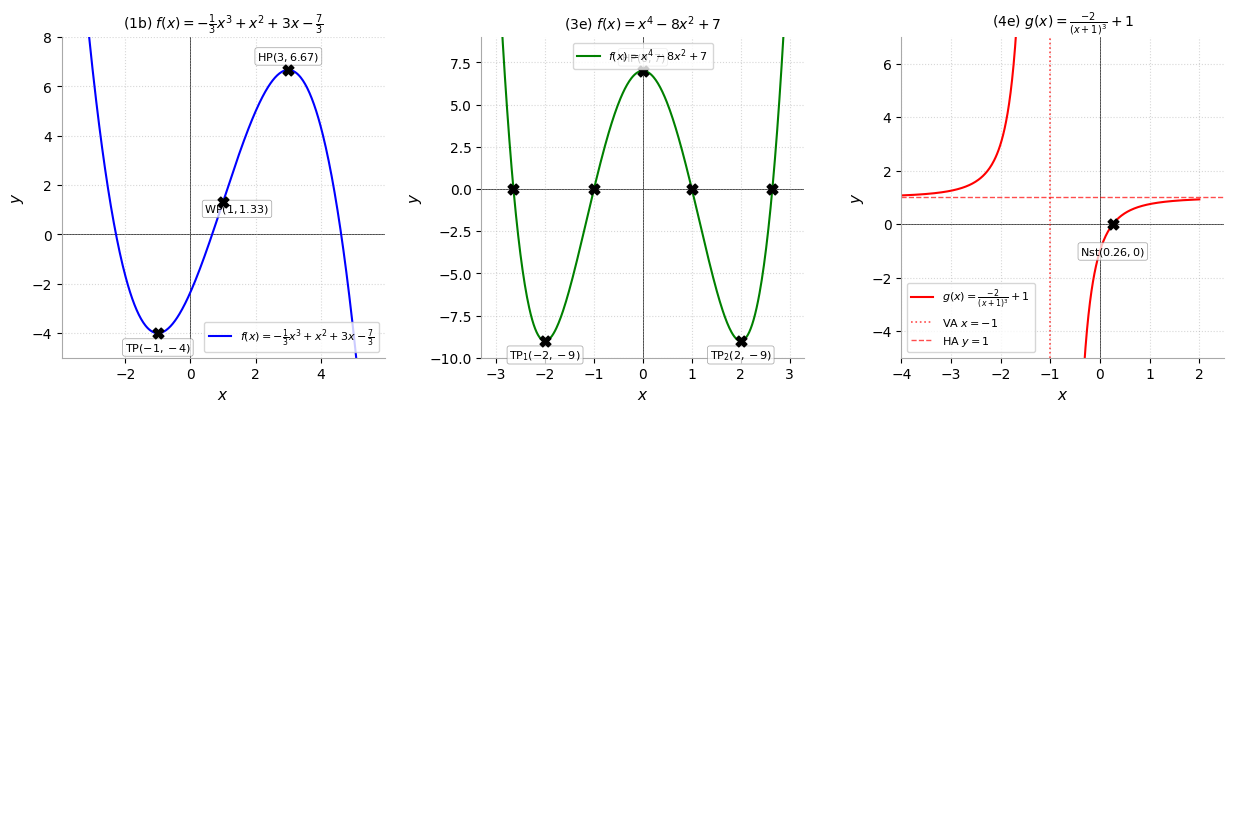

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.3) # 2 Zeilen, 3 Spalten
axs = gs.subplots() # Erzeugt ein Array von Axes-Objekten

point_marker = 'X'
point_size = 60
point_color = 'black'
bbox_props = dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.75, lw=0.5)
fontsize_annot = 8
epsilon = 1e-6 # Für Asymptoten

# --- (1b) f(x) = -1/3 x^3 + x^2 + 3x - 7/3 ---
ax_1b = axs[0, 0] # Benennung des Axes-Objekts geändert, um Klarheit zu schaffen
def f_1b(x): return (-1/3)*x**3 + x**2 + 3*x - (7/3)
x_1b_vals = np.linspace(-3.5, 5.5, 400) # x_vals umbenannt für Klarheit
y_1b_vals = f_1b(x_1b_vals) # y_vals umbenannt für Klarheit
ax_1b.plot(x_1b_vals, y_1b_vals, label='$f(x) = -\\frac{1}{3}x^3 + x^2 + 3x - \\frac{7}{3}$', color='blue')
# Punkte: HP(3, 20/3 ca 6.67), TP(-1, -4), WP(1, 4/3 ca 1.33)
hp_1b_x, hp_1b_y = 3, f_1b(3)
tp_1b_x, tp_1b_y = -1, f_1b(-1)
wp_1b_x, wp_1b_y = 1, f_1b(1)
points_1b_x_coords = [hp_1b_x, tp_1b_x, wp_1b_x] # Umbenannt für Klarheit
points_1b_y_coords = [hp_1b_y, tp_1b_y, wp_1b_y] # Umbenannt für Klarheit
labels_1b_text = [f'HP$(3, {hp_1b_y:.2f})$', f'TP$(-1, {tp_1b_y:.0f})$', f'WP$(1, {wp_1b_y:.2f})$'] # Umbenannt für Klarheit
offsets_1b_coords = [(0,5), (0,-15), (10, -10)] # Umbenannt für Klarheit

ax_1b.scatter(points_1b_x_coords, points_1b_y_coords, color=point_color, marker=point_marker, s=point_size, zorder=5)
for i, label_text in enumerate(labels_1b_text): # Umbenannt für Klarheit
    ax_1b.annotate(label_text, (points_1b_x_coords[i], points_1b_y_coords[i]), textcoords='offset points', xytext=offsets_1b_coords[i], ha='center', va='bottom', fontsize=fontsize_annot, bbox=bbox_props)
ax_1b.set_title('(1b) $f(x) = -\\frac{1}{3}x^3 + x^2 + 3x - \\frac{7}{3}$', fontsize=10)
ax_1b.set_ylim(-5, 8)

# --- (3e) f(x) = x^4 - 8x^2 + 7 ---
ax_3e = axs[0, 1] # Benennung des Axes-Objekts geändert
def f_3e(x): return x**4 - 8*x**2 + 7
x_3e_vals = np.linspace(-3, 3, 400) # x_vals umbenannt
y_3e_vals = f_3e(x_3e_vals) # y_vals umbenannt
ax_3e.plot(x_3e_vals, y_3e_vals, label='$f(x) = x^4 - 8x^2 + 7$', color='green')
# Punkte: HP(0,7), TPs(+-2, -9). Nst: x^2=u => u^2-8u+7=0 => (u-1)(u-7)=0 => u=1, u=7
# x^2=1 => x=+-1; x^2=7 => x=+-sqrt(7) ca +-2.65
hp_3e_x_coord, hp_3e_y_coord = 0, 7 # Umbenannt
tp1_3e_x_coord, tp1_3e_y_coord = -2, -9 # Umbenannt
tp2_3e_x_coord, tp2_3e_y_coord = 2, -9 # Umbenannt
nst_3e_coords = [-np.sqrt(7), -1, 1, np.sqrt(7)] # Umbenannt
points_3e_x_coords = [hp_3e_x_coord, tp1_3e_x_coord, tp2_3e_x_coord] + nst_3e_coords # Umbenannt
points_3e_y_coords = [hp_3e_y_coord, tp1_3e_y_coord, tp2_3e_y_coord] + [0]*4 # Umbenannt
labels_3e_text = [f'HP$(0,7)$', f'TP$_1(-2,-9)$', f'TP$_2(2,-9)$', 'N', 'N', 'N', 'N'] # Umbenannt
offsets_3e_coords = [(0,5), (0,-15), (0,-15)] + [(0,-15)]*4 # Umbenannt

ax_3e.scatter(points_3e_x_coords, points_3e_y_coords, color=point_color, marker=point_marker, s=point_size, zorder=5)
for i in range(3): # Nur HP und TPs beschriften für Übersicht
     ax_3e.annotate(labels_3e_text[i], (points_3e_x_coords[i], points_3e_y_coords[i]), textcoords='offset points', xytext=offsets_3e_coords[i], ha='center', va='bottom', fontsize=fontsize_annot, bbox=bbox_props)
ax_3e.set_title('(3e) $f(x) = x^4 - 8x^2 + 7$', fontsize=10)
ax_3e.set_ylim(-10, 9)

# --- (4e) g(x) = -2/((x+1)^3) + 1 ---
ax_4e = axs[0, 2] # Benennung des Axes-Objekts geändert
def f_4e(x): return np.where(np.abs(x+1) < epsilon, np.nan, -2/((x+1)**3) + 1)
x4e_left_vals = np.linspace(-4, -1 - epsilon, 200) # Umbenannt
x4e_right_vals = np.linspace(-1 + epsilon, 2, 200) # Umbenannt
ax_4e.plot(x4e_left_vals, f_4e(x4e_left_vals), color='red', label='$g(x) = \\frac{-2}{(x+1)^3} + 1$')
ax_4e.plot(x4e_right_vals, f_4e(x4e_right_vals), color='red')
# VA x=-1, HA y=1
ax_4e.axvline(-1, color='red', linestyle=':', linewidth=1.2, alpha=0.7, label='VA $x=-1$')
ax_4e.axhline(1, color='red', linestyle='--', linewidth=1.0, alpha=0.7, label='HA $y=1$')
# Nullstelle: -2/(x+1)^3 + 1 = 0 => (x+1)^3 = 2 => x+1 = cbrt(2) => x = cbrt(2)-1 ca 1.26-1 = 0.26
nst_4e_x_coord = np.cbrt(2)-1 # Umbenannt
ax_4e.scatter([nst_4e_x_coord], [0], color=point_color, marker=point_marker, s=point_size, zorder=5)
ax_4e.annotate(f'Nst$({nst_4e_x_coord:.2f},0)$', (nst_4e_x_coord,0), xytext=(0,-15), textcoords='offset points', ha='center', va='top', fontsize=fontsize_annot, bbox=bbox_props)
ax_4e.set_title('(4e) $g(x) = \\frac{-2}{(x+1)^3} + 1$', fontsize=10)
ax_4e.set_ylim(-5, 7)
ax_4e.set_xlim(-4, 2.5)

# Zwei leere Subplots, falls das Raster 2x3 ist und nur 3 Plots benötigt werden
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[1,2].axis('off')


# Allgemeine Einstellungen für alle genutzten Subplots
used_axs = [ax_1b, ax_3e, ax_4e]
for ax_curr in used_axs:
    if ax_curr.get_figure() is None: continue
    ax_curr.set_xlabel('$x$', fontsize=11)
    ax_curr.set_ylabel('$y$', fontsize=11)
    ax_curr.axhline(0, color='black', lw=0.5, zorder=0)
    ax_curr.axvline(0, color='black', lw=0.5, zorder=0)
    ax_curr.grid(True, linestyle=':', alpha=0.5, zorder=0)
    ax_curr.legend(fontsize=8, loc='best')
    for spine in ax_curr.spines.values():
        spine.set_edgecolor('darkgrey')
    ax_curr.spines['right'].set_color('none')
    ax_curr.spines['top'].set_color('none')

fig.tight_layout(pad=2.0)

# Grafik speichern
try:
    plt.savefig('uebergreifend_alle_graphen.png', dpi=300)
    print("Grafik 'uebergreifend_alle_graphen.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'f_produktregel_anwendung_graph.png' wurde erfolgreich erstellt und gespeichert.


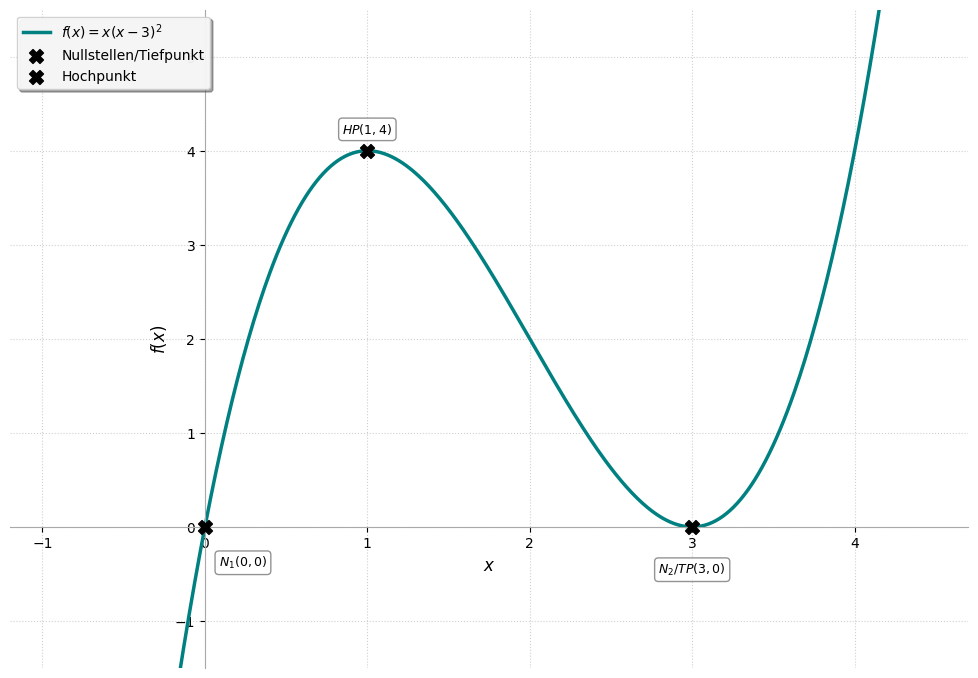

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Definiere die Funktion
def f(x):
    return x * (x - 3)**2

# x-Werte für die Darstellung der Kurve
# Um den Verlauf gut zu zeigen, von etwas links von 0 bis etwas rechts von 3 (und darüber hinaus)
x_vals_line = np.linspace(-1, 4.5, 500)
y_vals_line = f(x_vals_line)

# Wichtige Punkte
# Nullstellen: (0|0) - Schnittpunkt; (3|0) - Berührpunkt (Tiefpunkt)
n1_x, n1_y = 0, f(0)
n2_x, n2_y = 3, f(3) # Dies ist auch der Tiefpunkt

# Lokaler Hochpunkt: (1|4)
# f'(x) = (x-3)^2 + x*2(x-3) = (x-3)(x-3+2x) = (x-3)(3x-3) = 3(x-3)(x-1)
# f'(x)=0 => x=1 oder x=3
hp_x, hp_y = 1, f(1) # f(1) = 1*(1-3)^2 = 1*(-2)^2 = 4

# Tiefpunkt (identisch mit Nullstelle n2)
tp_x, tp_y = n2_x, n2_y


# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 7))

# Farben
func_color = 'teal'
point_color = 'black'
text_color = 'black'

# Funktion plotten
ax.plot(x_vals_line, y_vals_line, color=func_color, linewidth=2.5, label='$f(x) = x(x-3)^2$', zorder=2)

# Punkte markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.85, lw=1)

# Nullstelle (0,0)
ax.scatter(n1_x, n1_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'$N_1({n1_x},{n1_y})$', (n1_x, n1_y), textcoords="offset points",
            xytext=(10, -20), ha='left', va='top', fontsize=9, bbox=bbox_props)

# Nullstelle/Tiefpunkt (3,0)
ax.scatter(n2_x, n2_y, color=point_color, marker=marker_style, s=marker_size, zorder=5, label='Nullstellen/Tiefpunkt')
ax.annotate(f'$N_2/TP({n2_x},{n2_y})$', (n2_x, n2_y), textcoords="offset points",
            xytext=(0, -25), ha='center', va='top', fontsize=9, bbox=bbox_props)

# Hochpunkt (1,4)
ax.scatter(hp_x, hp_y, color=point_color, marker=marker_style, s=marker_size, zorder=5, label='Hochpunkt')
ax.annotate(f'$HP({hp_x},{hp_y})$', (hp_x, hp_y), textcoords="offset points",
            xytext=(0, 10), ha='center', va='bottom', fontsize=9, bbox=bbox_props)


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$f(x)$', fontsize=12, fontweight='bold')
# ax.set_title("Graph von $f(x) = x(x-3)^2$", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende
ax.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen
ax.set_xlim(-1.2, 4.7)
ax.set_ylim(-1.5, 5.5)
ax.set_xticks(np.arange(-1, 5, 1))
ax.set_yticks(np.arange(-1, 6, 1))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('f_produktregel_anwendung_graph.png', dpi=300)
    print("Grafik 'f_produktregel_anwendung_graph.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()


Grafik 'f_tueftler_produkt_kette_graph.png' wurde erfolgreich erstellt und gespeichert.


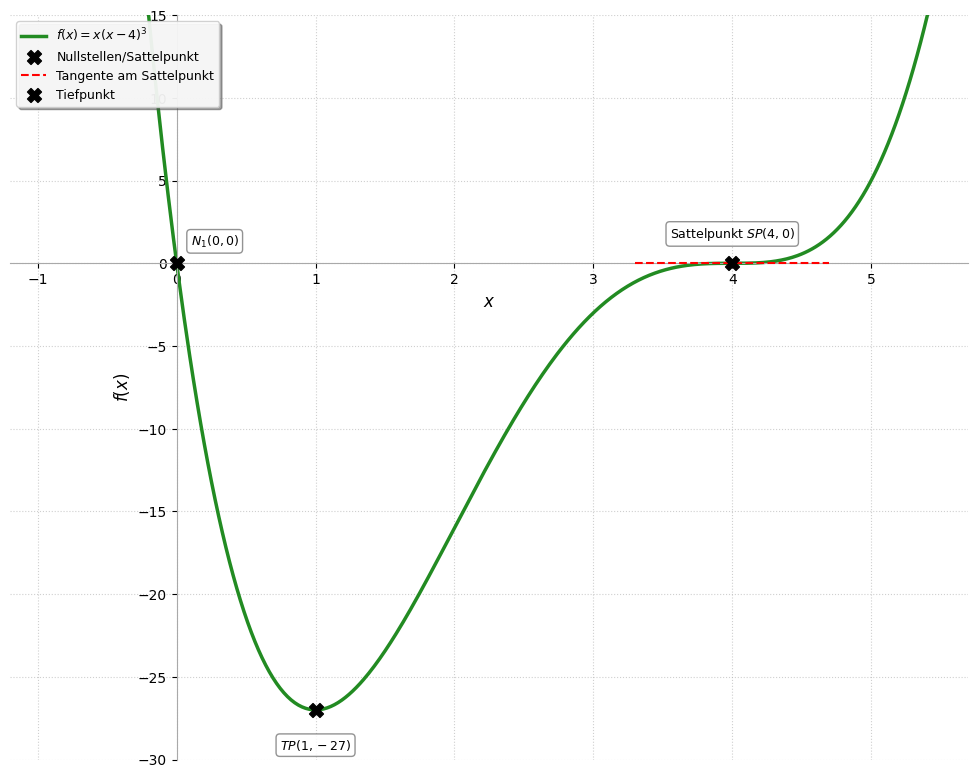

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Definiere die Funktion
def f(x):
    return x * (x - 4)**3

# x-Werte für die Darstellung der Kurve
# Bereich, der die relevanten Punkte zeigt
x_vals_line = np.linspace(-1, 5.5, 500)
y_vals_line = f(x_vals_line)

# Wichtige Punkte
# Nullstellen: (0|0) - Schnittpunkt; (4|0) - Sattelpunkt.
n1_x, n1_y = 0, f(0)
sp_x, sp_y = 4, f(4) # Sattelpunkt ist auch Nullstelle

# Lokaler Tiefpunkt: (1|-27)
# f'(x) = (x-4)^3 + 3x(x-4)^2 = (x-4)^2 * (x-4+3x) = (x-4)^2 * (4x-4) = 4(x-1)(x-4)^2
# f'(x)=0 => x=1 oder x=4
tp_x, tp_y = 1, f(1) # f(1) = 1*(1-4)^3 = 1*(-3)^3 = -27

# Plot-Stil
try:
    plt.style.use('seaborn-v0_8-pastel')
except OSError:
    plt.style.use('seaborn-v0_8-whitegrid') # Fallback-Stil

fig, ax = plt.subplots(figsize=(10, 8))

# Farben
func_color = 'forestgreen'
point_color = 'black'
tangent_color = 'red'
text_color = 'black'

# Funktion plotten
ax.plot(x_vals_line, y_vals_line, color=func_color, linewidth=2.5, label='$f(x) = x(x-4)^3$', zorder=2)

# Punkte markieren und beschriften
marker_style = 'X'
marker_size = 100
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.85, lw=1)

# Nullstelle (0,0)
ax.scatter(n1_x, n1_y, color=point_color, marker=marker_style, s=marker_size, zorder=5)
ax.annotate(f'$N_1({n1_x},{n1_y})$', (n1_x, n1_y), textcoords="offset points",
            xytext=(10, 10), ha='left', va='bottom', fontsize=9, bbox=bbox_props)

# Sattelpunkt (4,0)
ax.scatter(sp_x, sp_y, color=point_color, marker=marker_style, s=marker_size, zorder=5, label='Nullstellen/Sattelpunkt')
ax.annotate(f'Sattelpunkt $SP({sp_x},{sp_y})$', (sp_x, sp_y), textcoords="offset points",
            xytext=(0, 15), ha='center', va='bottom', fontsize=9, bbox=bbox_props)
# Horizontale Tangente am Sattelpunkt
tangent_len_sp = 0.7
ax.plot([sp_x - tangent_len_sp, sp_x + tangent_len_sp], [sp_y, sp_y],
        color=tangent_color, linestyle='--', linewidth=1.5, zorder=4, label='Tangente am Sattelpunkt')


# Tiefpunkt (1,-27)
ax.scatter(tp_x, tp_y, color=point_color, marker=marker_style, s=marker_size, zorder=5, label='Tiefpunkt')
ax.annotate(f'$TP({tp_x},{tp_y})$', (tp_x, tp_y), textcoords="offset points",
            xytext=(0, -20), ha='center', va='top', fontsize=9, bbox=bbox_props)


# Achsen und Titel
ax.set_xlabel('$x$', fontsize=12, fontweight='bold')
ax.set_ylabel('$f(x)$', fontsize=12, fontweight='bold')
# ax.set_title("Graph von $f(x) = x(x-4)^3$", fontsize=14, fontweight='bold') # Titel auskommentiert

ax.axhline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.axvline(0, color='black', lw=0.7, linestyle='-', zorder=0)
ax.grid(True, linestyle=':', alpha=0.6, zorder=0)

for spine in ax.spines.values():
    spine.set_edgecolor('darkgrey')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Legende
ax.legend(loc='upper left', fontsize=9, frameon=True, framealpha=0.9, shadow=True)

# Achsenlimits anpassen
ax.set_xlim(-1.2, 5.7)
ax.set_ylim(-30, 15)
ax.set_xticks(np.arange(-1, 6, 1))
ax.set_yticks(np.arange(-30, 16, 5))

# Gesamtlayout anpassen
plt.tight_layout(pad=1.5)

# Grafik speichern
try:
    plt.savefig('f_tueftler_produkt_kette_graph.png', dpi=300)
    print("Grafik 'f_tueftler_produkt_kette_graph.png' wurde erfolgreich erstellt und gespeichert.")
except Exception as e:
    print(f"Fehler beim Speichern der Grafik: {e}")

# Grafik anzeigen
plt.show()
